# **DEMO**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tqdm import tqdm
import codedapertures as ca
import scipy as sp
import os
import cv2

from scipy.ndimage.filters import convolve
import time
import pickle

from utils import get_objects_from_config
from experiment import CodApSimulator, play_simulation, plot_results
from image_preprocessing import process_image
from decoding_algorythms import get_mura_decoding_pattern

## 1. Juli's and George's experiment

One of our first objectives was to simulate numerically what our peers Juli and George were doing experimentally, that is, testing the results seen on a screen of iluminating masks with different shapes with sources also with different shapes.

- Descripción del experimento
- Descripción del uso de sus imágenes y de desición de variables
- !!! Cambiar Fotons a Photons !!!

In [2]:
def simul_exp(config_path):
    source, slit, sensor, options = get_objects_from_config(config_path)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
    play_simulation(simulator=simulator, config_path=config_path)

    fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
    plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    im1 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
    axs[2].set_title("Sensor Screen")
    axs[2].grid(False)
    fig.colorbar(im1, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    plt.show()
    plt.savefig(os.path.join(simulator.saving_dir, "exp_juli_george.png"))

    return simulator

#### 1.1) **Source:** 'Lambda - **Mask:** 'Carita Feliz'

In [3]:
config_path = "exp_juli_george.json"

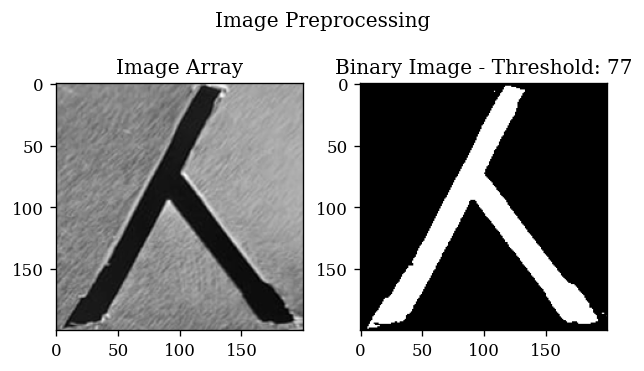

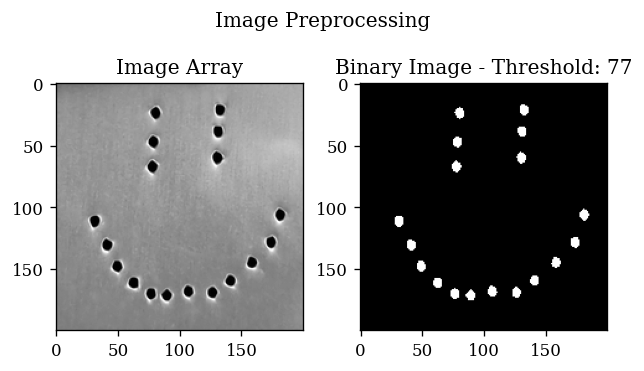

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george1


Process 16124:   0%|          | 34/50000 [00:00<02:28, 336.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [01:52<00:00, 446.14it/s]


Adding noise to the image...
Done!
Saving results...


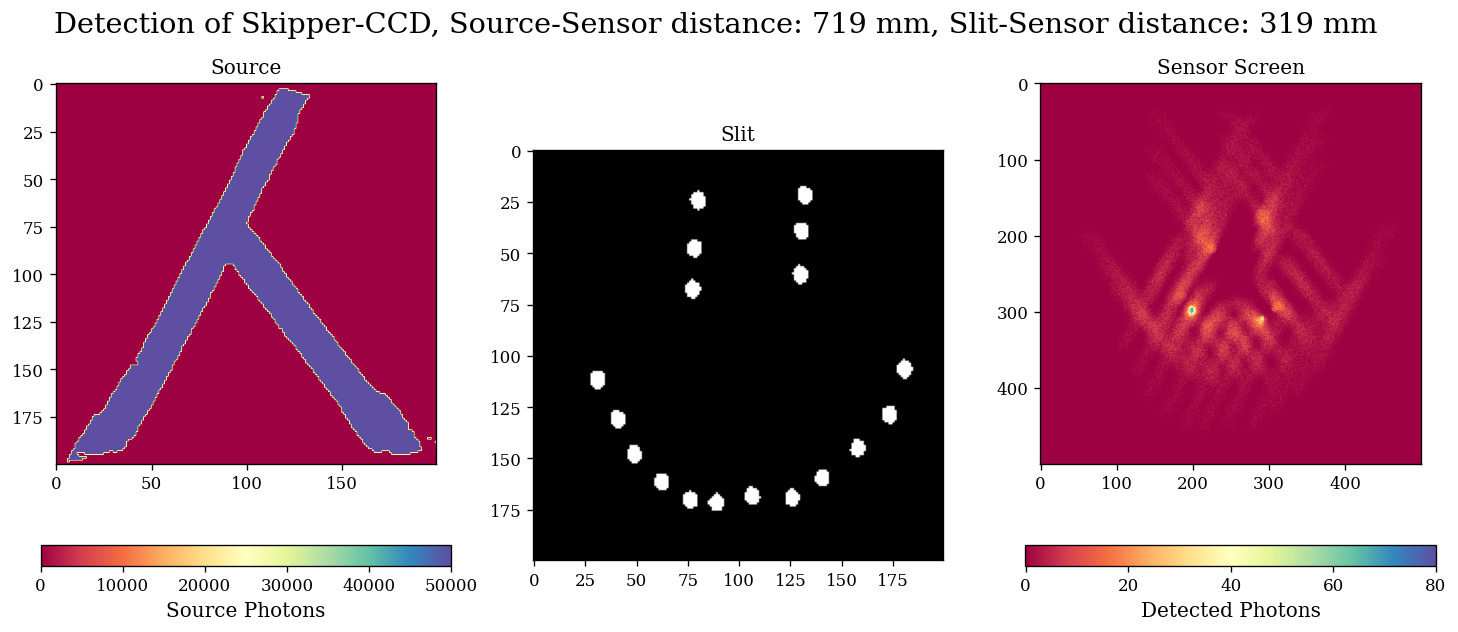

<Figure size 720x480 with 0 Axes>

In [64]:
sim1 = simul_exp(config_path)

#### 1.2) **Source:** 'Lambda' - **Mask:** 'Lambda'

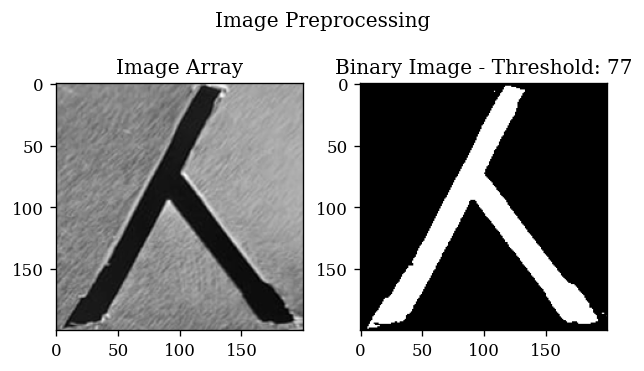

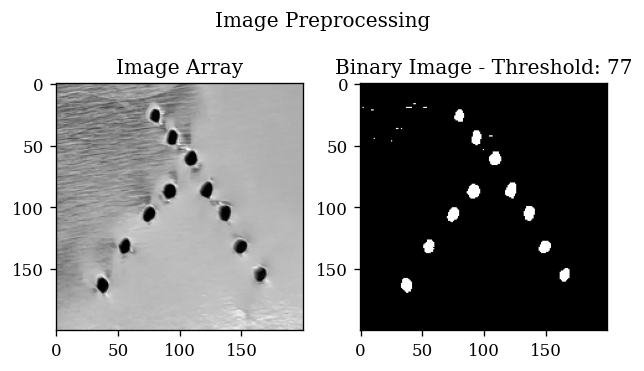

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george2


Process 4420:   0%|          | 34/50000 [00:00<02:28, 335.70it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 4420: 100%|██████████| 50000/50000 [01:59<00:00, 419.38it/s]


Adding noise to the image...
Done!
Saving results...


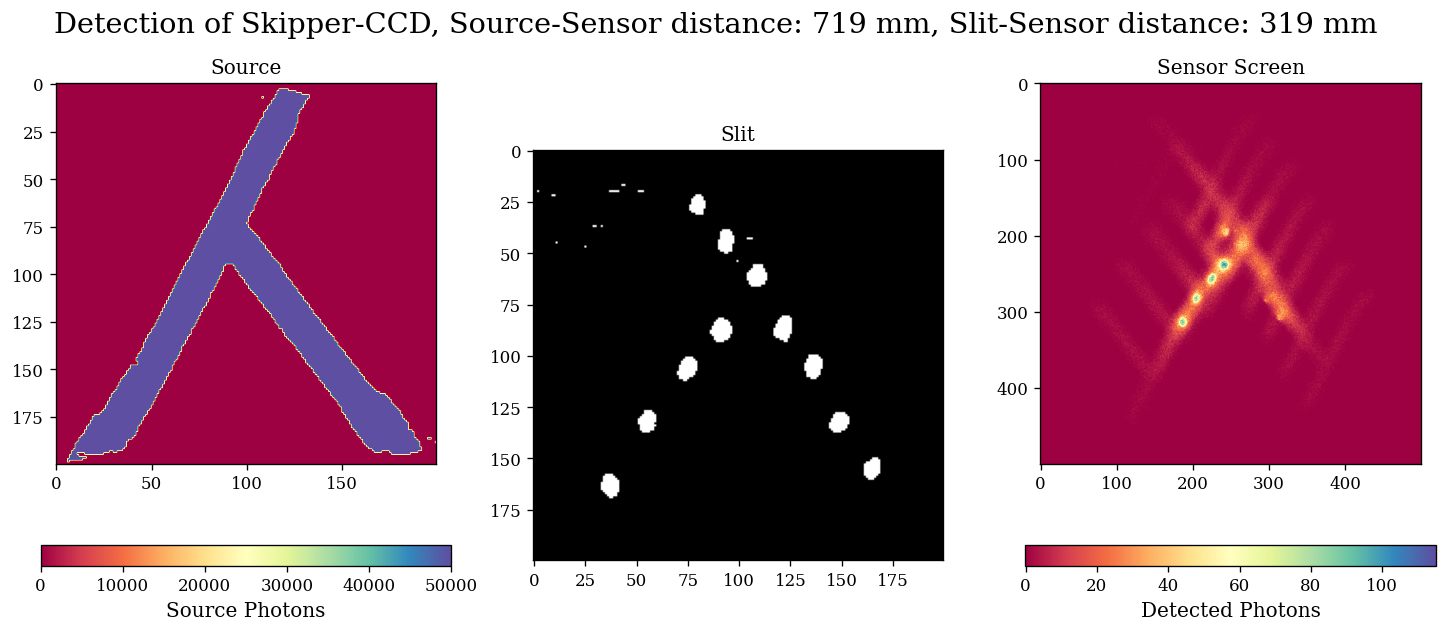

<Figure size 720x480 with 0 Axes>

In [4]:
sim2 = simul_exp(config_path)

#### 1.3) **Source:** 'Lambda' - **Mask:** 'Pinhole'

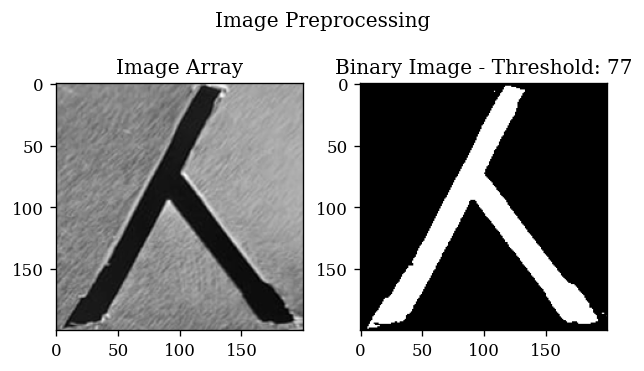

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george3


Process 11344:   0%|          | 20/50000 [00:00<04:34, 182.17it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 11344: 100%|██████████| 50000/50000 [01:43<00:00, 481.63it/s]


Adding noise to the image...
Done!
Saving results...


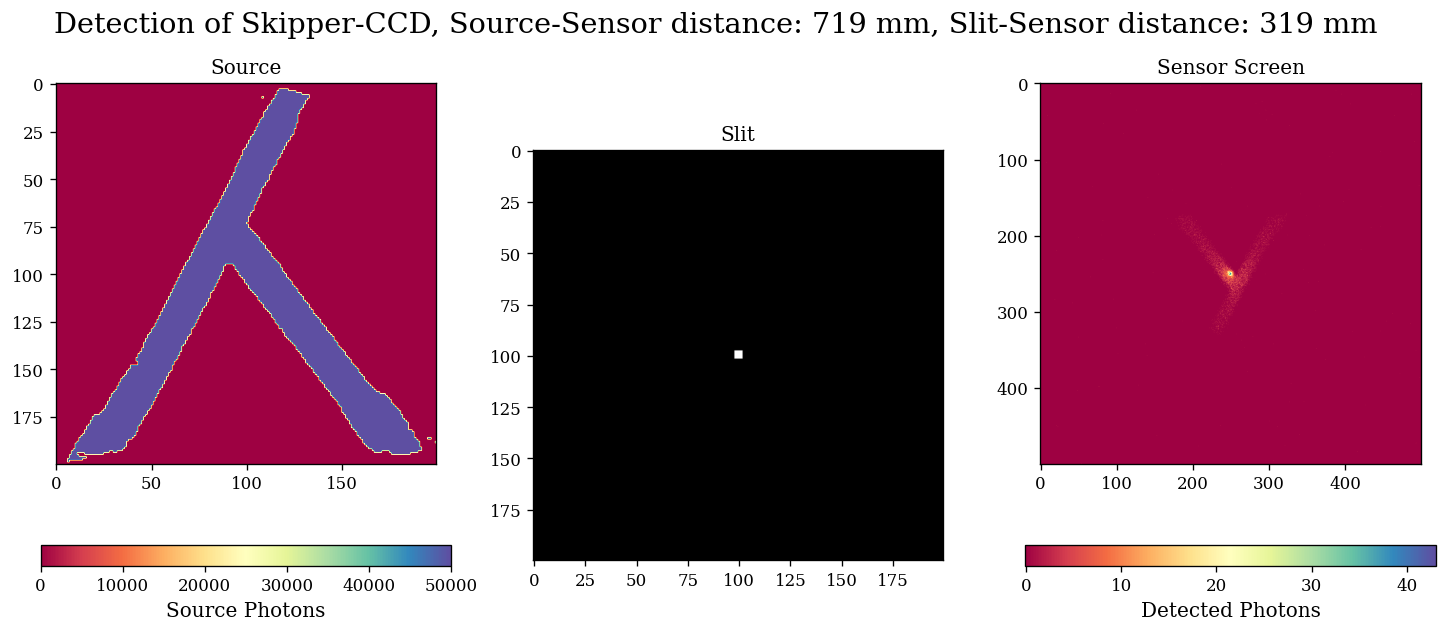

<Figure size 720x480 with 0 Axes>

In [4]:
sim3 = simul_exp(config_path)

## 2. Skipper Characterization

* Details of read out noise and dark current

#### Studing the results detecting different sources passing through a slit with a Perfect Detector - Skipper CCD - Normal CCD 

In [2]:
def compare_exps(config_paths, plot_hist = False):
    sensors = []
    bin_edges = []
    hist_values = []

    for config in config_paths:
        source, slit, sensor, options = get_objects_from_config(config)
        simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
        play_simulation(simulator=simulator, config_path=config)
        sensors.append(simulator.sensor)


        unique, c = np.unique(simulator.sensor.screen, return_counts=True)
        h_val, b_edges = np.histogram(simulator.sensor.screen, bins=np.round(unique))
        bin_edges.append(b_edges)
        hist_values.append(h_val)


    #Graph source vs slit (Experiment State)
    fig, axs = plt.subplots(ncols = 2, figsize = (10,6))
    plt.suptitle(f'Experiment State, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    plt.show()

    #Graph 3 results
    fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
    plt.suptitle(f'Detection of a same experiment by different sensors', fontsize = 'xx-large')
    im0 = axs[0].imshow(sensors[0].screen, cmap = "Spectral")
    axs[0].set_title("Perfect CCD")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Detected Photons', orientation = 'horizontal')
    im1 = axs[1].imshow(sensors[1].screen, cmap = "Spectral")
    axs[1].set_title("Skipper CCD")
    axs[1].grid(False)
    fig.colorbar(im1, ax=axs[1], label = 'Detected Photons', orientation = 'horizontal')
    im2 = axs[2].imshow(sensors[2].screen, cmap = "Spectral")
    axs[2].set_title("Normal CCD")
    axs[2].grid(False)
    fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    plt.show()

    if plot_hist == True:
        # Plot the histogram
        fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
        plt.suptitle(f'Distribution of charge', fontsize = 'xx-large')
        axs[0].bar(bin_edges[0][:-1], hist_values[0]/np.sum(hist_values[0]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'red')
        axs[0].set_xlabel('N° of photons per pixel')
        axs[0].set_ylabel('Frequency')
        axs[0].set_title('Perfect CCD')
        axs[1].bar(bin_edges[1][:-1], hist_values[1]/np.sum(hist_values[1]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'green')
        axs[1].set_xlabel('N° of photons per pixel')
        axs[1].set_ylabel('Frequency')
        axs[1].set_title('Skipper CCD')
        axs[2].bar(bin_edges[2][:-1], hist_values[2]/np.sum(hist_values[2]), align='center', width=0.5, ec='k', linewidth = 0.4, color= 'yellow')
        axs[2].set_xlabel('N° of photons per pixel')
        axs[2].set_ylabel('Frequency')
        axs[2].set_title('Normal CCD')
        plt.show()

    return simulator, sensors        

Experiment 1:
- **Source:** *Grid*
- **Slit:** *Pinhole*

In [3]:
config_paths = ["characterization_perfect.json", "characterization_skipper.json", "characterization_ccd.json"]

The chosen directory is not empty:
results\characterization_perfect\characterization


Process 5692:   0%|          | 103/50000 [00:00<00:49, 1011.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:27<00:00, 1806.88it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization


Process 5692:   0%|          | 113/50000 [00:00<00:44, 1129.77it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:27<00:00, 1788.67it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization


Process 5692:   0%|          | 138/50000 [00:00<00:36, 1379.93it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 5692: 100%|██████████| 50000/50000 [00:22<00:00, 2221.22it/s]


Adding noise to the image...
Done!
Saving results...


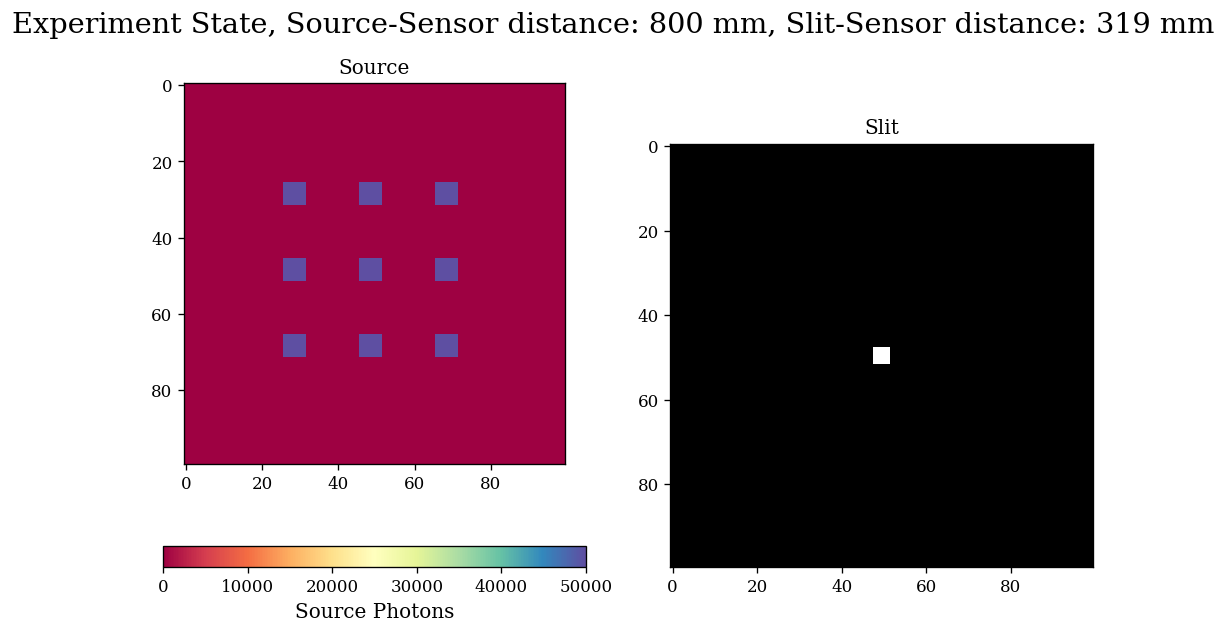

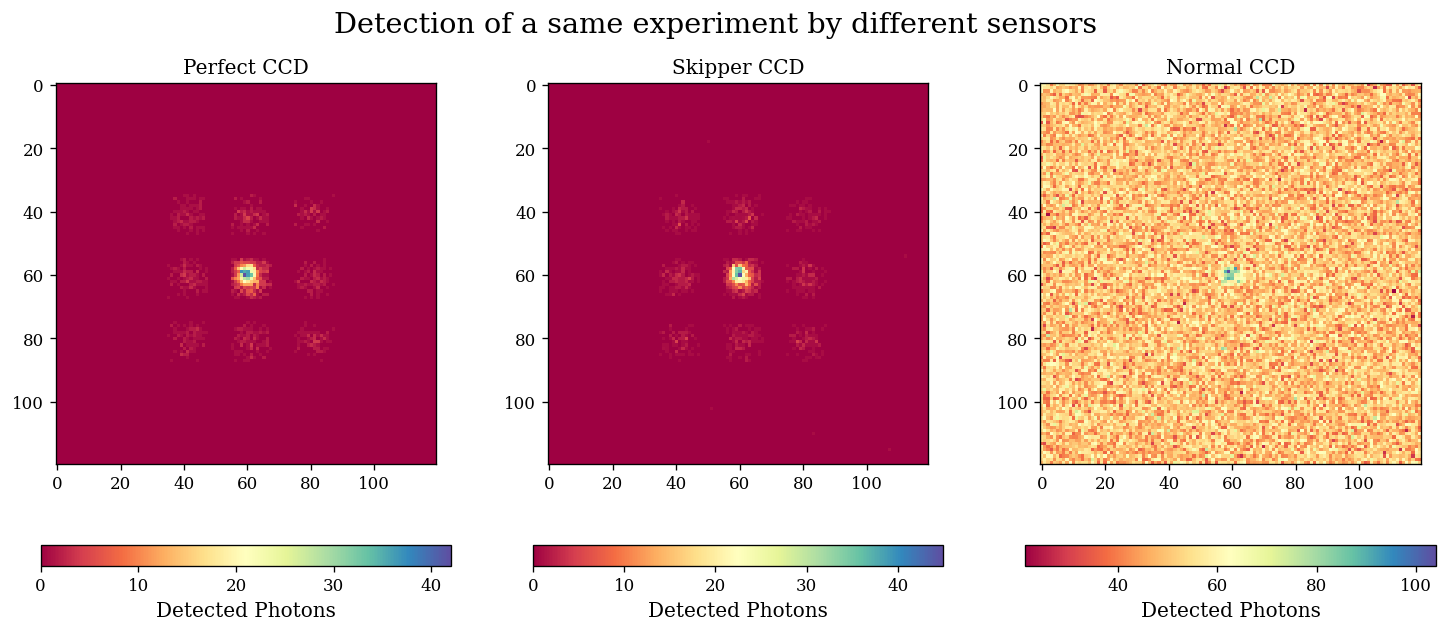

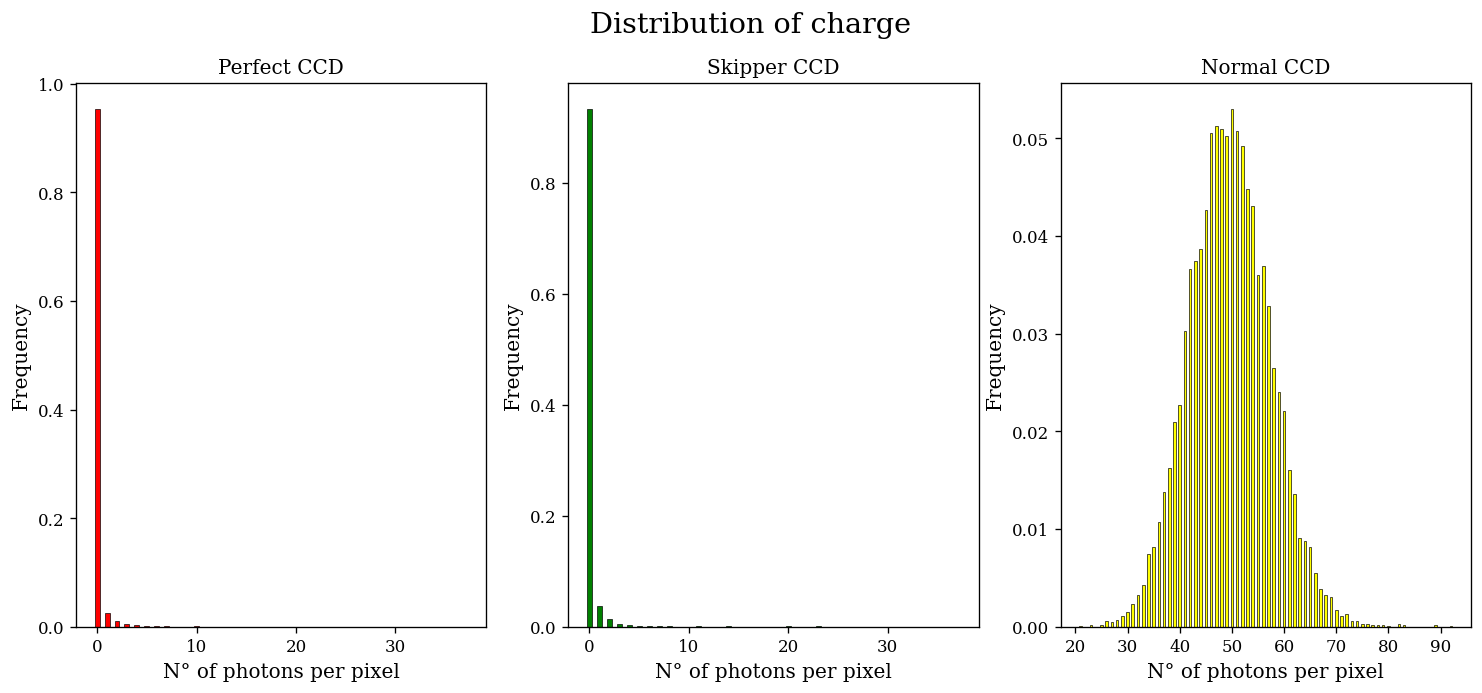

In [4]:
sim1, sensors1 = compare_exps(config_paths, plot_hist= True)

Experiment 2:
- **Source:** *Lambda*
- **Slit:** *Pinhole*

The chosen directory is not empty:
results\characterization_perfect\characterization2


Process 12816:   0%|          | 48/50000 [00:00<01:48, 459.99it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:04<00:00, 773.15it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization2


Process 12816:   0%|          | 79/50000 [00:00<01:03, 783.48it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:07<00:00, 739.91it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization2


Process 12816:   0%|          | 53/50000 [00:00<01:43, 482.98it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 12816: 100%|██████████| 50000/50000 [01:12<00:00, 691.11it/s]


Adding noise to the image...
Done!
Saving results...


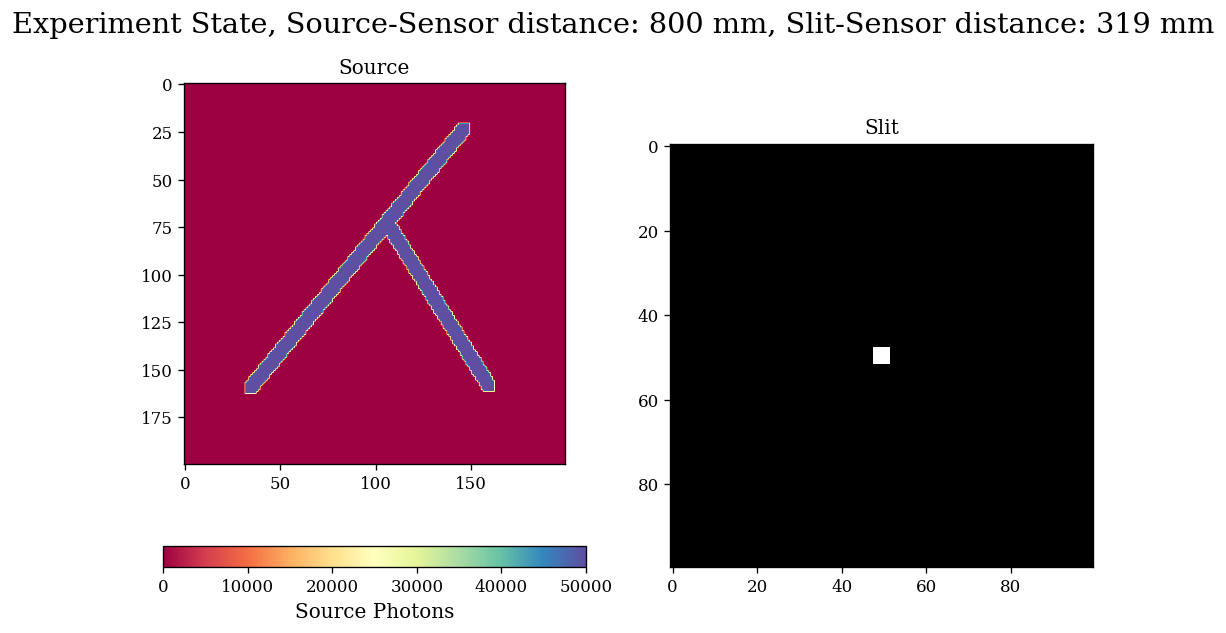

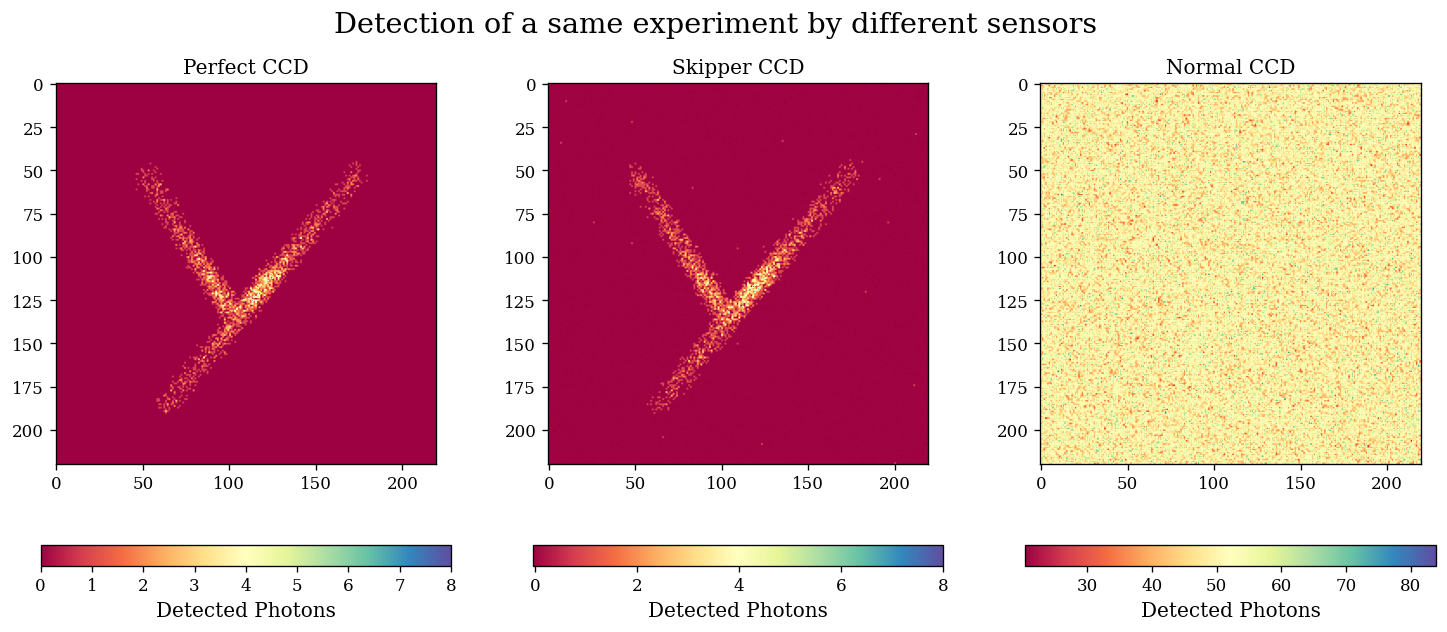

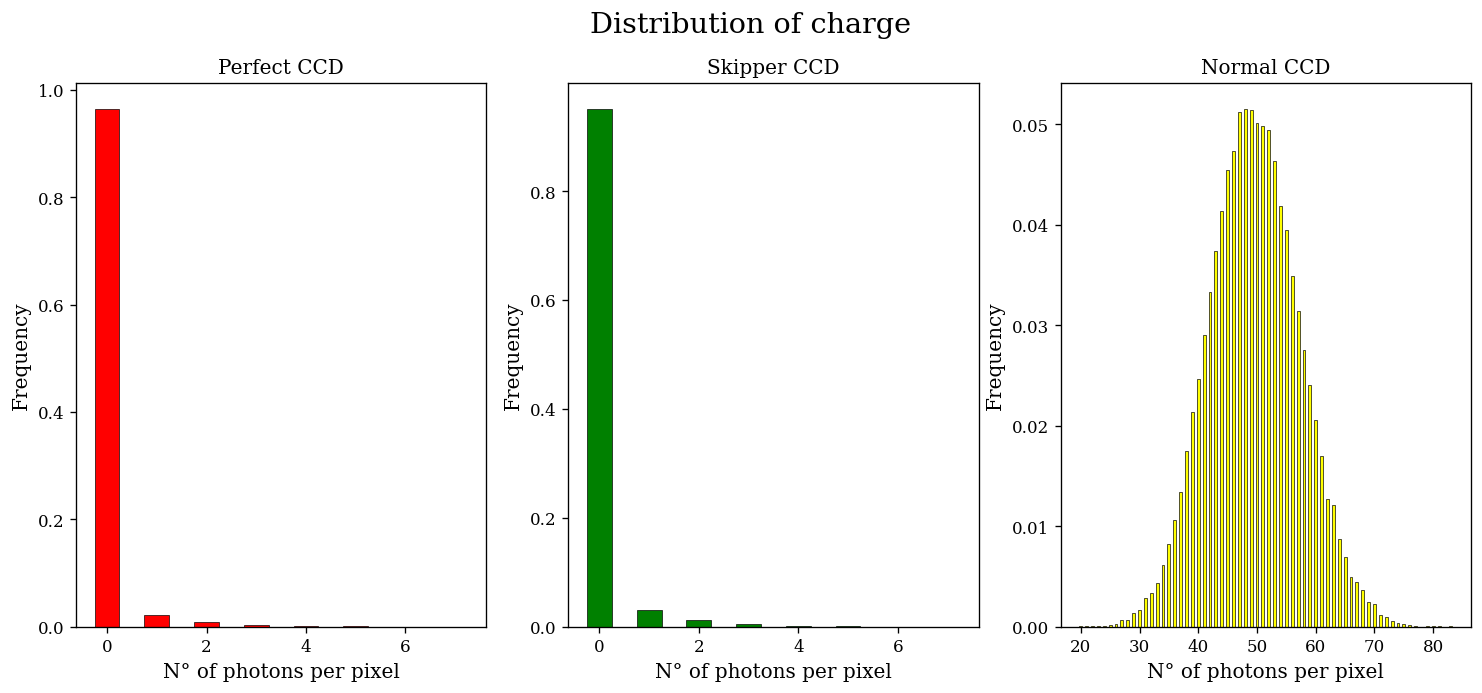

In [4]:
sim2, sensors2 = compare_exps(config_paths, plot_hist=True)

Experiment 3:
- **Source:** *Grid*
- **Slit:** *Phi*

The chosen directory is not empty:
results\characterization_perfect\characterization3


Process 16124:   0%|          | 188/50000 [00:00<00:26, 1863.60it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:22<00:00, 2228.92it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 58
h_val: 57
The chosen directory is not empty:
results\characterization_skipper\characterization3


Process 16124:   0%|          | 239/50000 [00:00<00:21, 2357.72it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:23<00:00, 2161.38it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 14400
h_val: 14399
The chosen directory is not empty:
results\characterization_ccd\characterization3


Process 16124:   0%|          | 207/50000 [00:00<00:24, 2026.08it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16124: 100%|██████████| 50000/50000 [00:22<00:00, 2189.22it/s]


Adding noise to the image...
Done!
Saving results...
In loop:
bin_edges: 14400
h_val: 14399
Out of loop:
bin_edges[0]: 57, bin_edges[1]: 14399, bin_edges[2]: 14399
h_val:
hist_values[0]: 57, hist_values[1]: 14399, hist_values[2]: 14399


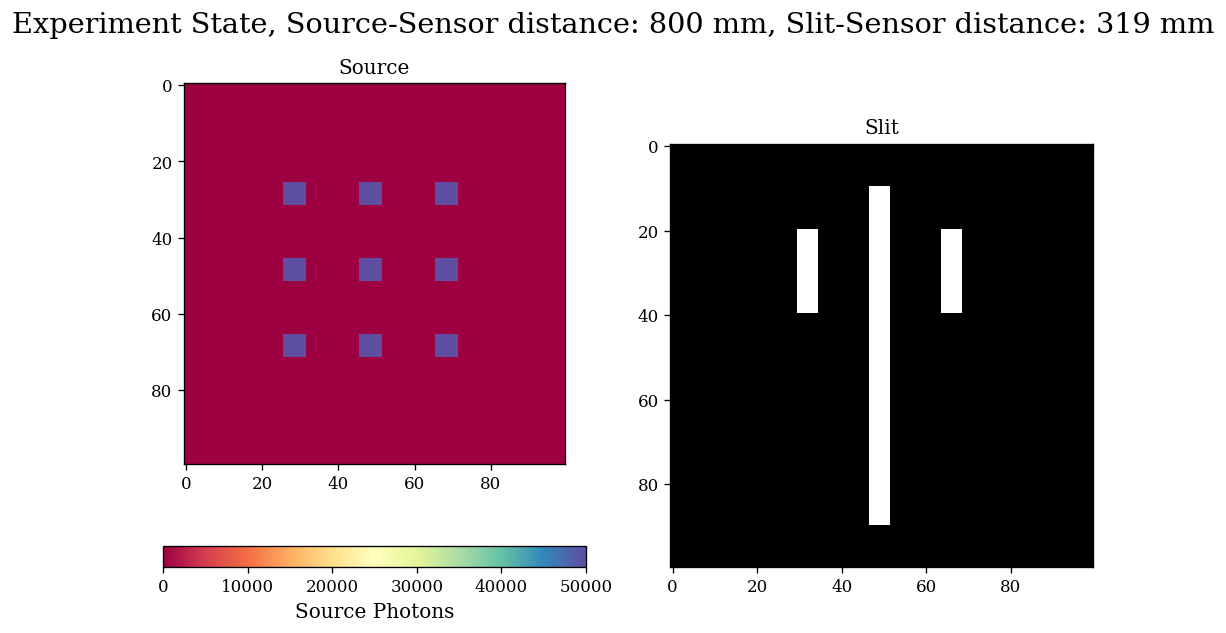

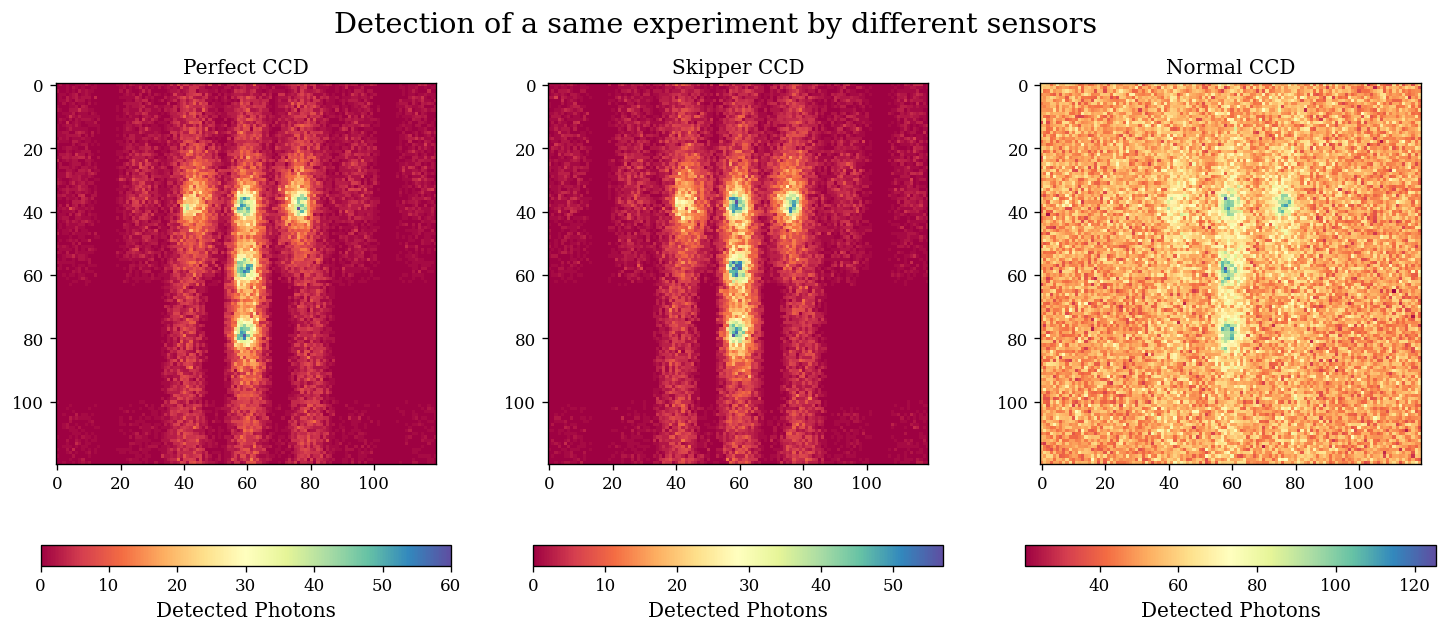

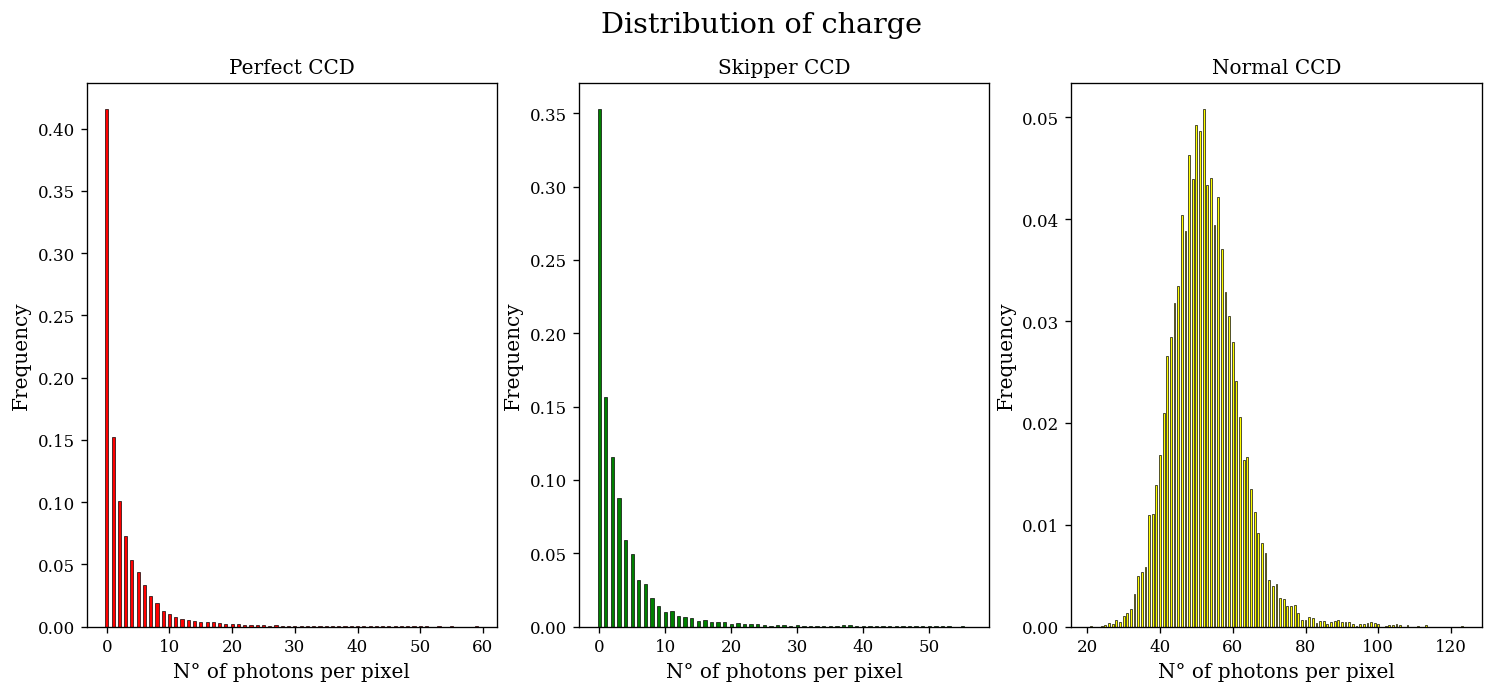

In [58]:
sim3, sensors3 = compare_exps(config_paths, plot_hist=True)

Experiment 4:
- **Source:** *Frame*
- **Slit:** *Phi*

The chosen directory is not empty:
results\characterization_perfect\characterization4


Process 14712:   0%|          | 78/50000 [00:00<01:06, 753.21it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:33<00:00, 1490.73it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization4


Process 14712:   0%|          | 118/50000 [00:00<00:42, 1178.47it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:35<00:00, 1406.87it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization4


Process 14712:   0%|          | 116/50000 [00:00<00:44, 1120.50it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 14712: 100%|██████████| 50000/50000 [00:30<00:00, 1614.06it/s]


Adding noise to the image...
Done!
Saving results...


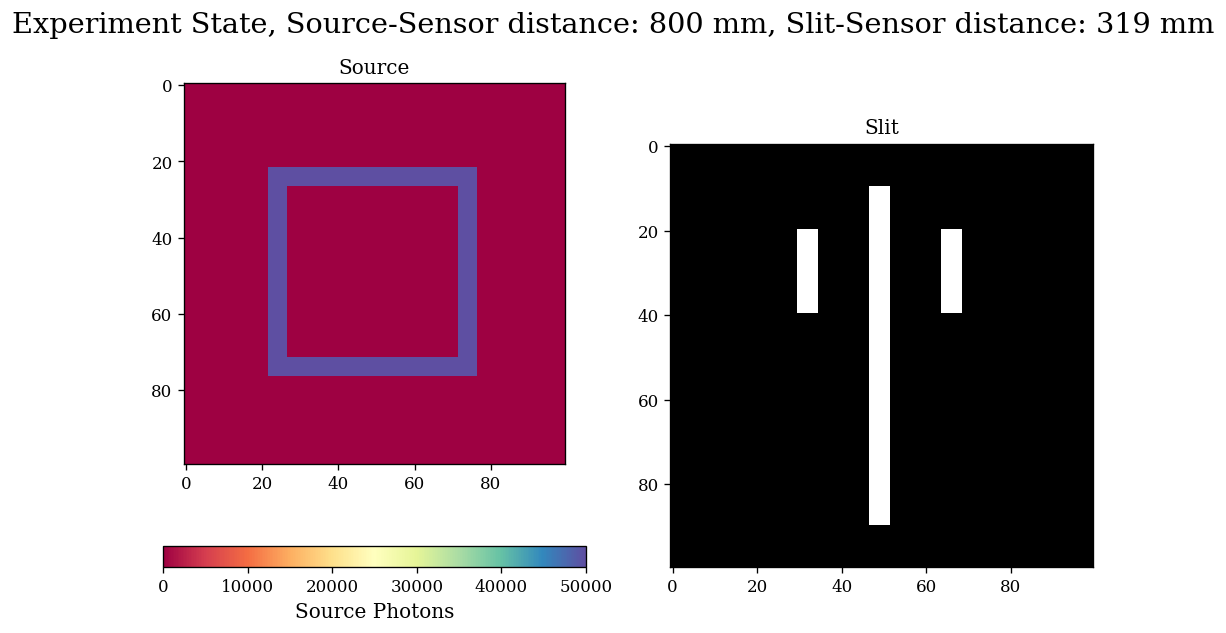

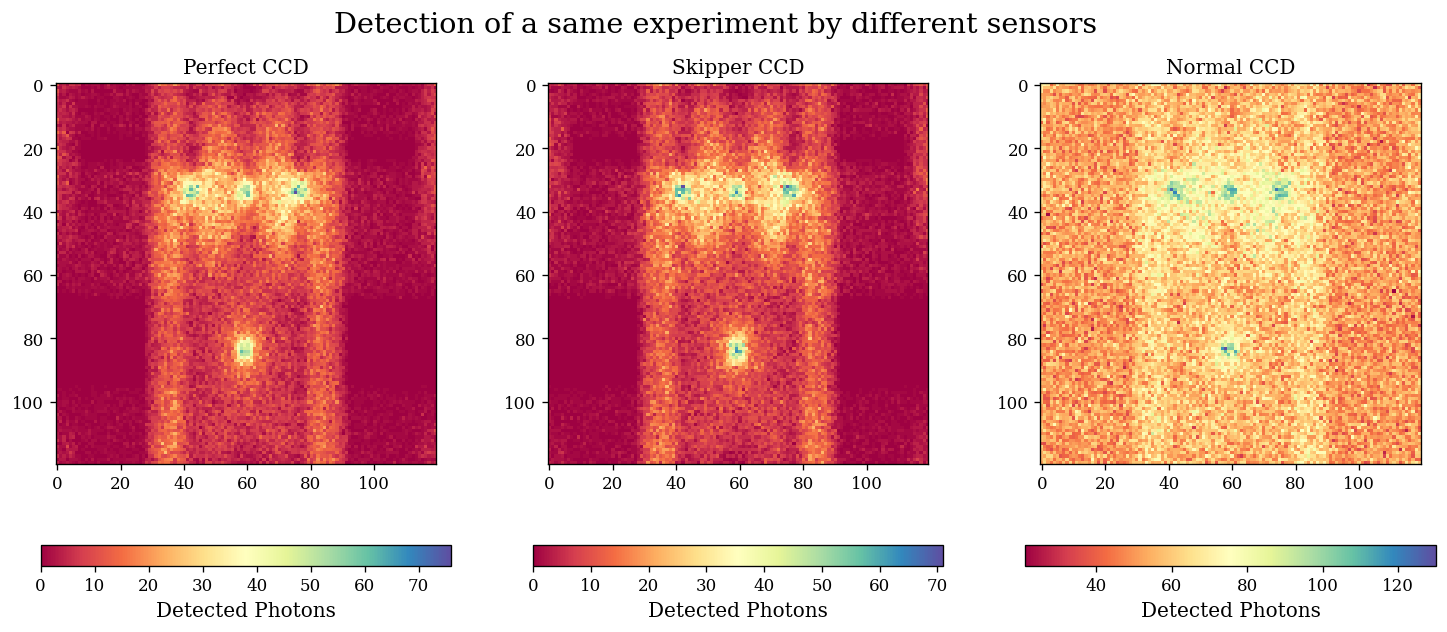

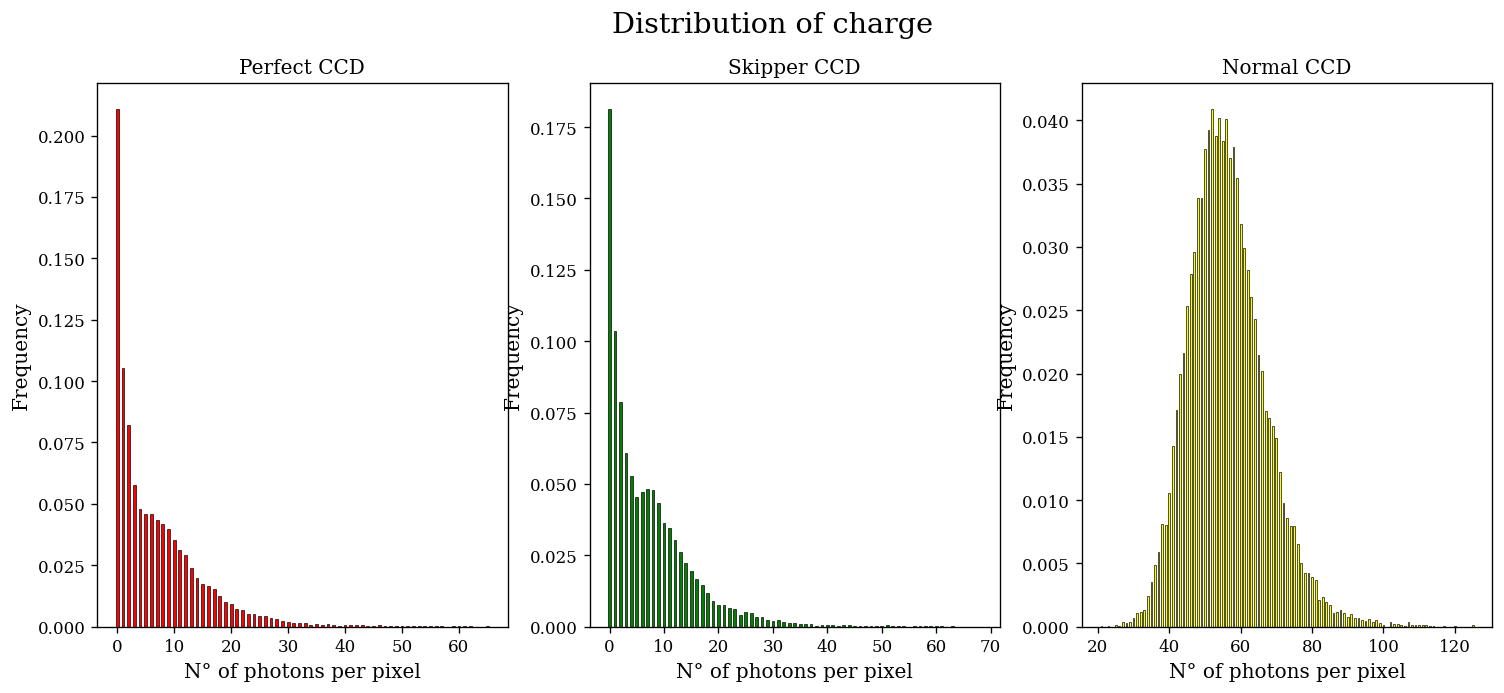

In [5]:
sim4, sensors4 = compare_exps(config_paths, plot_hist=True)

## 3. Study of Decoding Algorithms

In [2]:
def graph_ca(simulator):
    if simulator.sensor.dark_current_noise == 0.0005:
        sensor_name = 'Skipper CCD'
    else:
        sensor_name = 'Normal CCD'

    fig, axs = plt.subplots(ncols = 4,  figsize = (20,6))
    plt.suptitle(f'Detection of {sensor_name}, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: {simulator.options.source_to_sensor_distance - simulator.options.source_to_slit_distance} mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    fig.savefig(os.path.join(simulator.saving_dir, "results0.png"))
    im2 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
    axs[2].set_title("Sensor")
    axs[2].grid(False)
    fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    im3 = axs[3].imshow((simulator.decoder.decoded_image), cmap = "Spectral")
    axs[3].set_title("Decoded Image")
    axs[3].grid(False)
    fig.colorbar(im3, ax=axs[3], label = 'Photons in Reconstruction', orientation = 'horizontal')
    fig.savefig(os.path.join(simulator.saving_dir, "results1.png"))
    plt.show()


### **3.1) MURA**

In [4]:
configs = ['mura_exps_trin/mura_exp0.json', 'mura_exps_trin/mura_exp1.json', 'mura_exps_trin/mura_exp2.json', 'mura_exps_trin/mura_exp3.json', 'mura_exps_trin/mura_exp4.json']
simulators = []

Modifico la distancia entre sistema Source-Slit y el sensor. La distancia Source-Slit queda siempre fija a 5000 mm.

In [5]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators.append(simulator)
    graph_ca(simulator=simulator)

FileNotFoundError: [Errno 2] No such file or directory: 'mura_exps_trin/mura_exp0.json'

Modifying Pattern, having a unique tile and also making the source pattern larger 

In [2]:
configs = ['mura_exps_trin/mura_exp0.json', 'mura_exps_trin/mura_exp1.json', 'mura_exps_trin/mura_exp2.json', 'mura_exps_trin/mura_exp3.json', 'mura_exps_trin/mura_exp4.json']
simulators1 = []

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp0\testing4_mura0


Process 10912:   0%|          | 6/5000 [00:00<01:33, 53.68it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 10912: 100%|██████████| 5000/5000 [01:15<00:00, 65.95it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


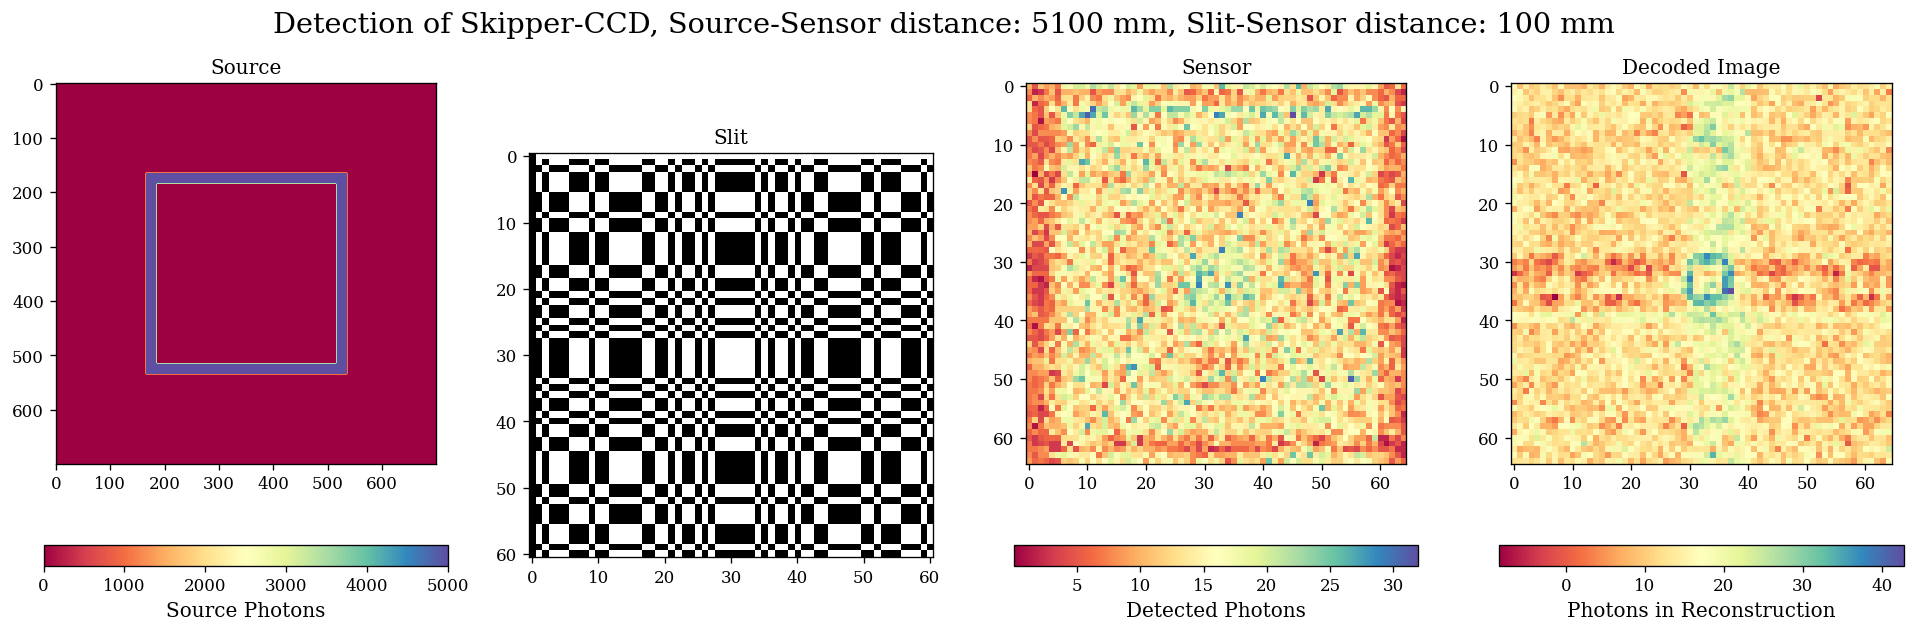

Process 10912:   0%|          | 4/5000 [00:00<02:33, 32.53it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 10912: 100%|██████████| 5000/5000 [01:14<00:00, 67.05it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


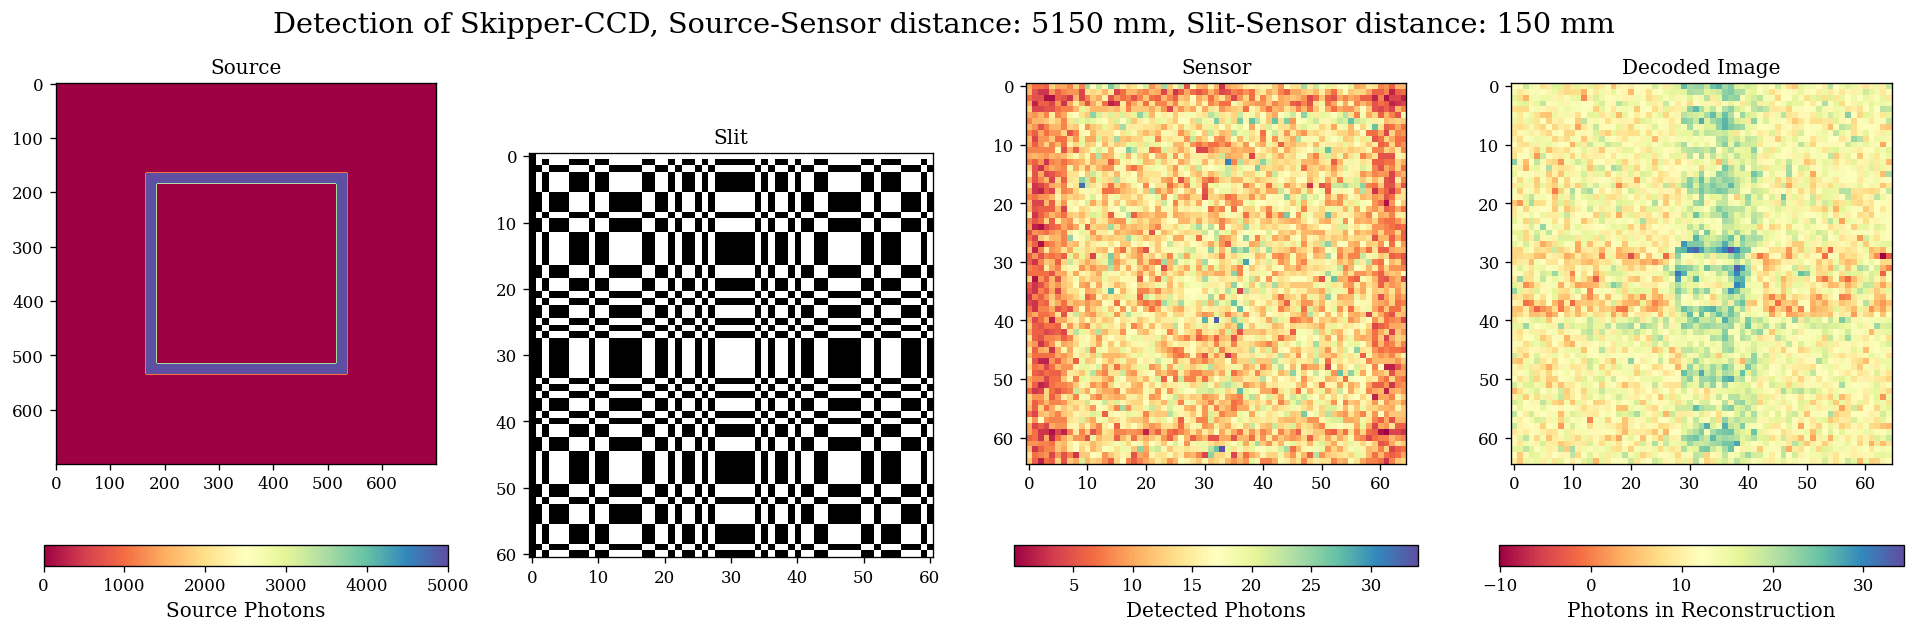

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp2\testing2_mura2


Process 10912:   0%|          | 3/5000 [00:00<03:45, 22.21it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 10912: 100%|██████████| 5000/5000 [01:15<00:00, 65.94it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


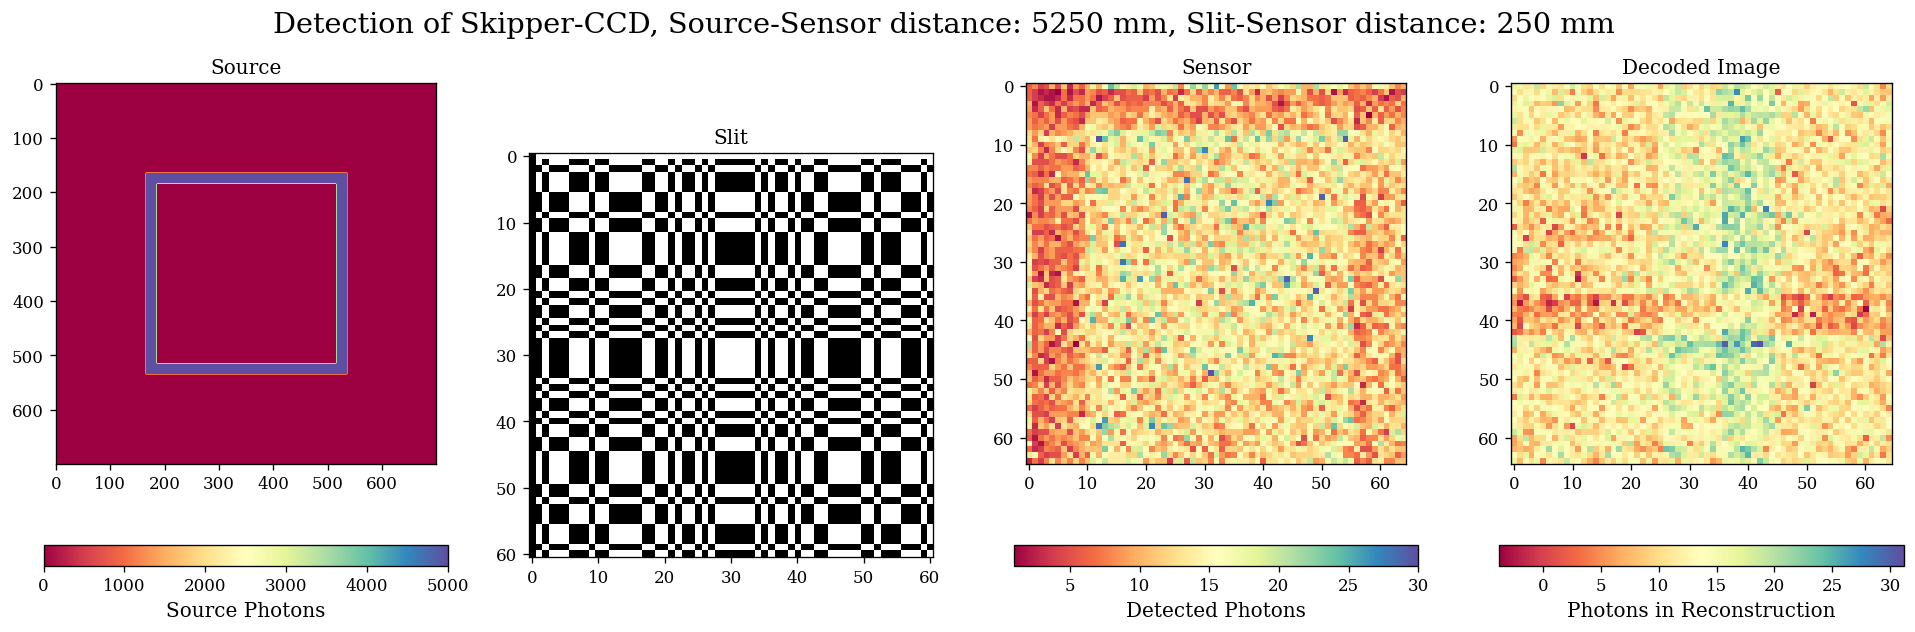

Process 10912:   0%|          | 3/5000 [00:00<03:16, 25.43it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 10912: 100%|██████████| 5000/5000 [01:15<00:00, 65.93it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


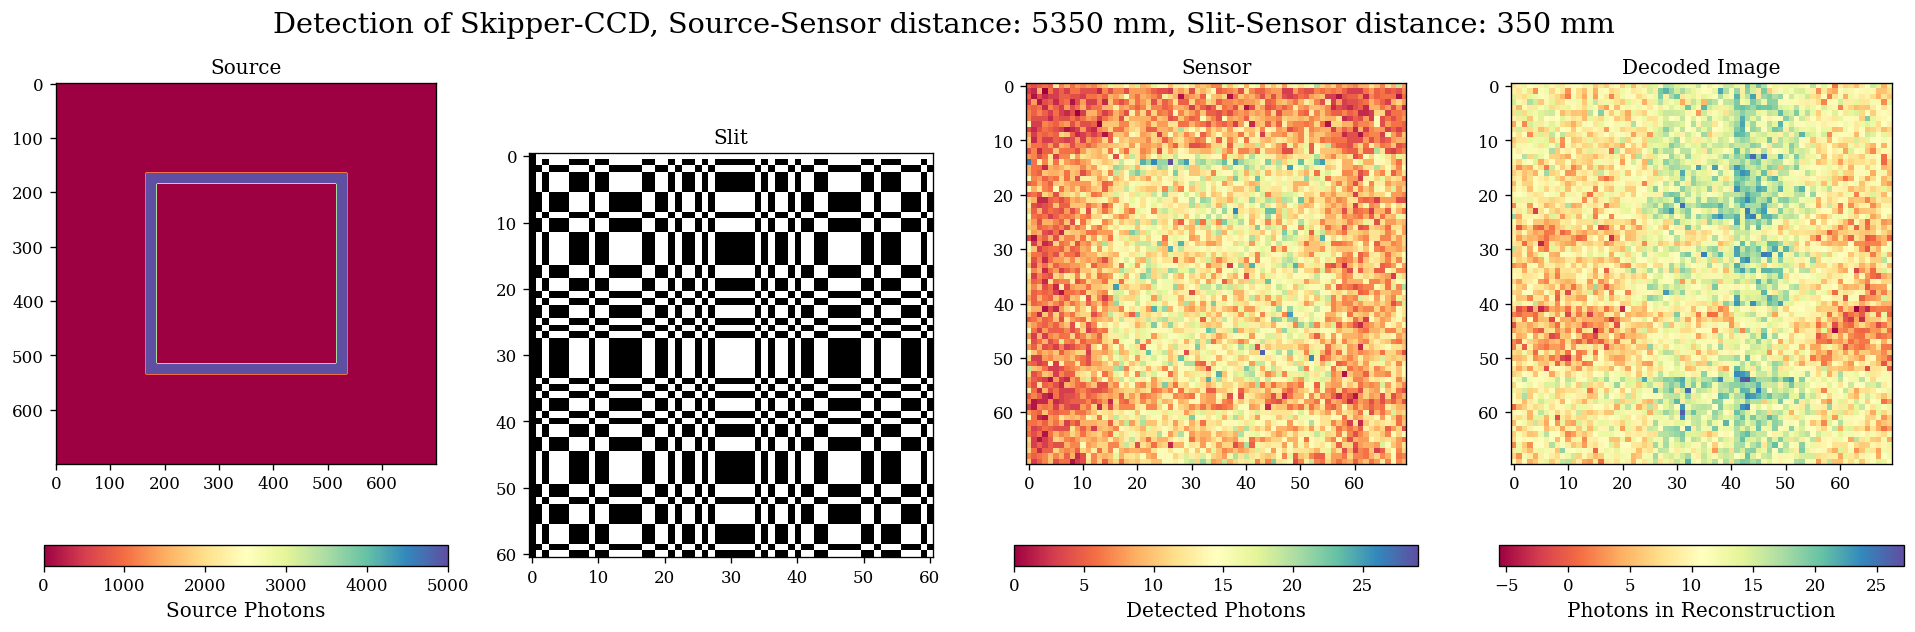

Process 10912:   0%|          | 6/5000 [00:00<01:31, 54.48it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 10912: 100%|██████████| 5000/5000 [01:19<00:00, 63.12it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


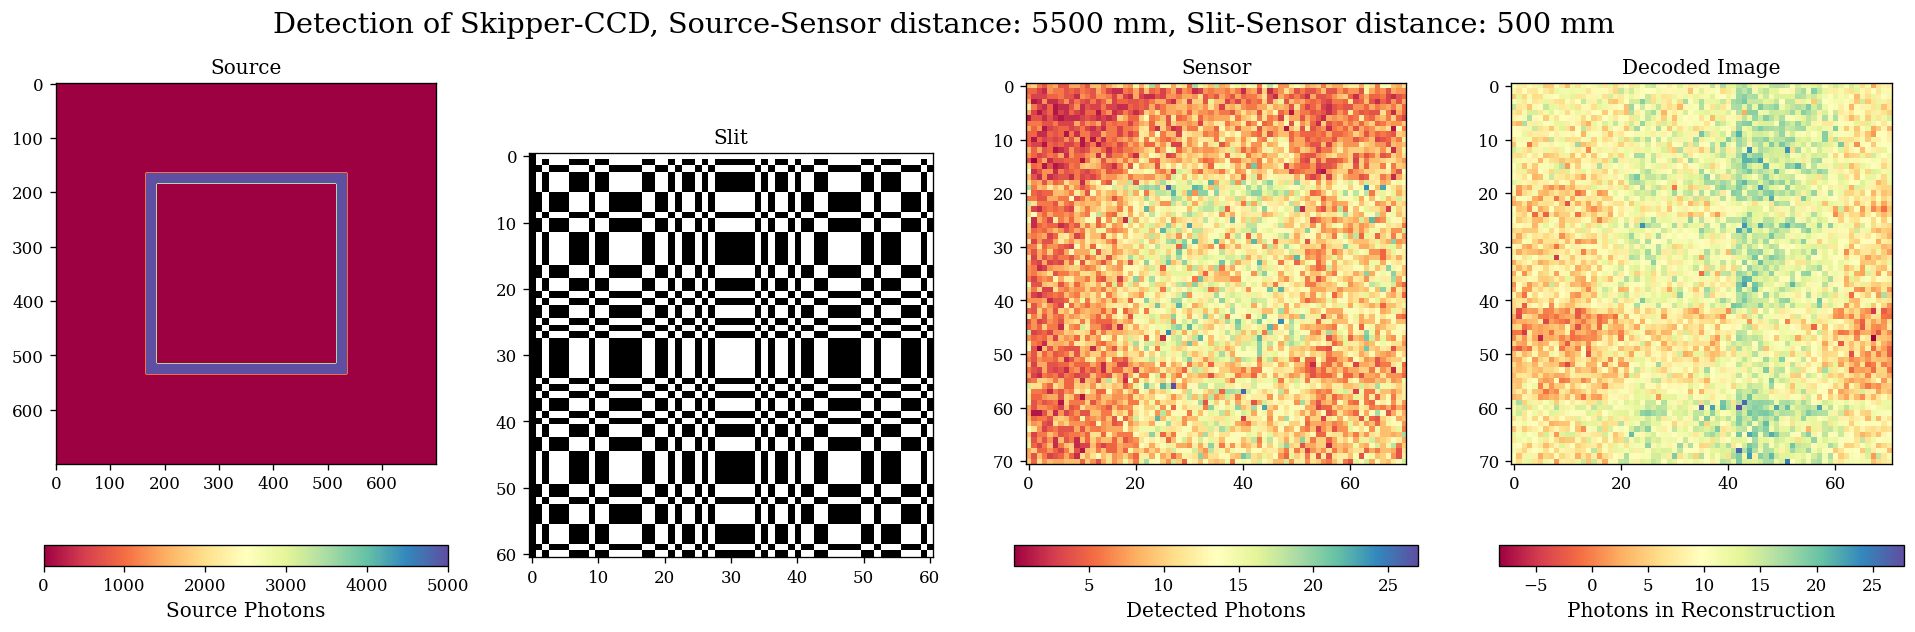

In [5]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators1.append(simulator)
    graph_ca(simulator=simulator)

Making the distance between the slit and the sensor smaller

In [7]:
configs = ['mura_exps_trin/mura_exp0.json', 'mura_exps_trin/mura_exp1.json', 'mura_exps_trin/mura_exp2.json']
simulators2 = []

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp0\testing3_mura0


Process 17248:   0%|          | 6/5000 [00:00<01:33, 53.58it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 17248: 100%|██████████| 5000/5000 [01:14<00:00, 66.84it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


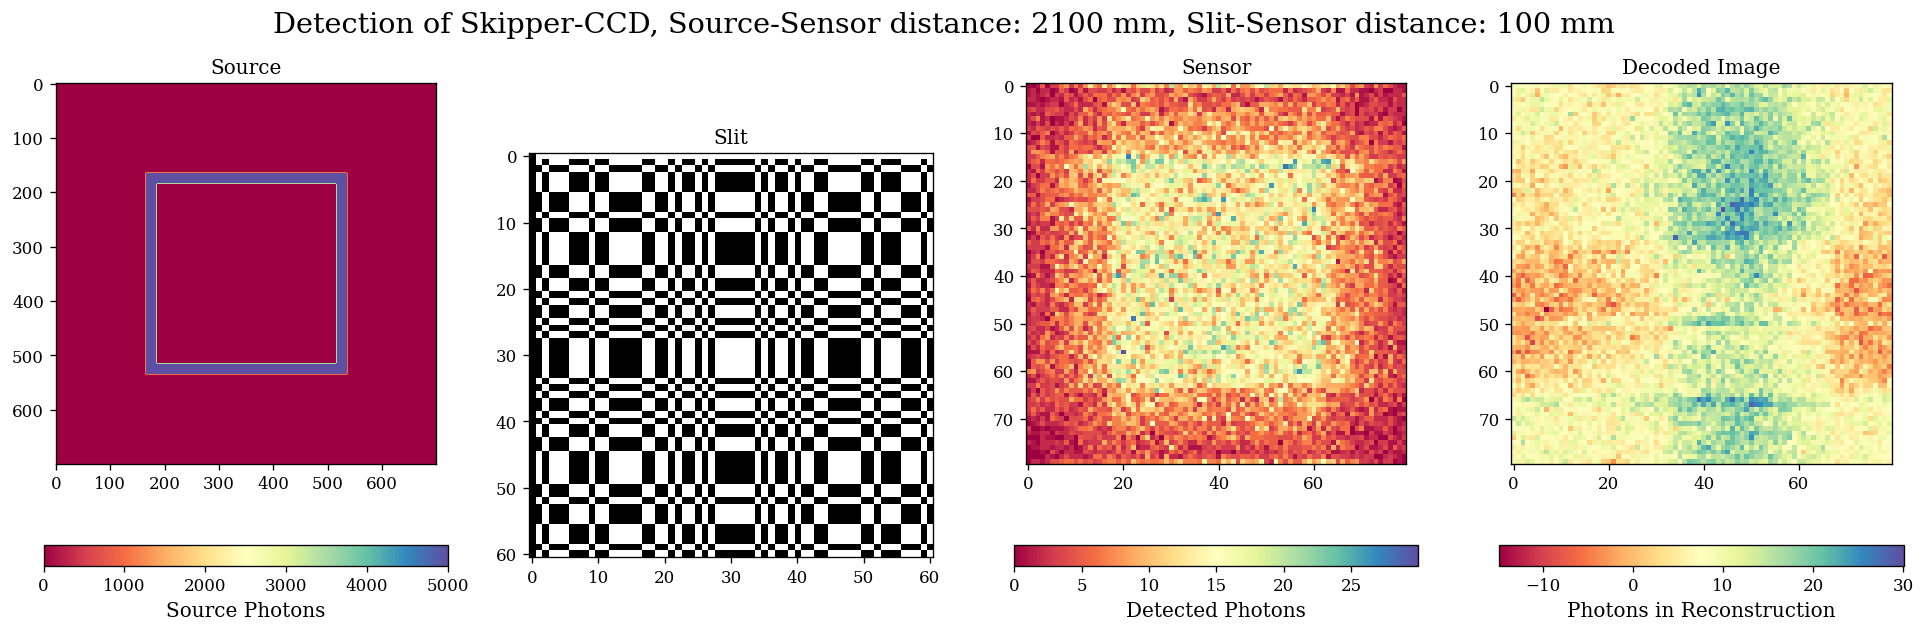

Process 17248:   0%|          | 5/5000 [00:00<01:50, 45.15it/s]

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
Simulating the propagation of photons through the slit...


Process 17248: 100%|██████████| 5000/5000 [01:18<00:00, 63.62it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


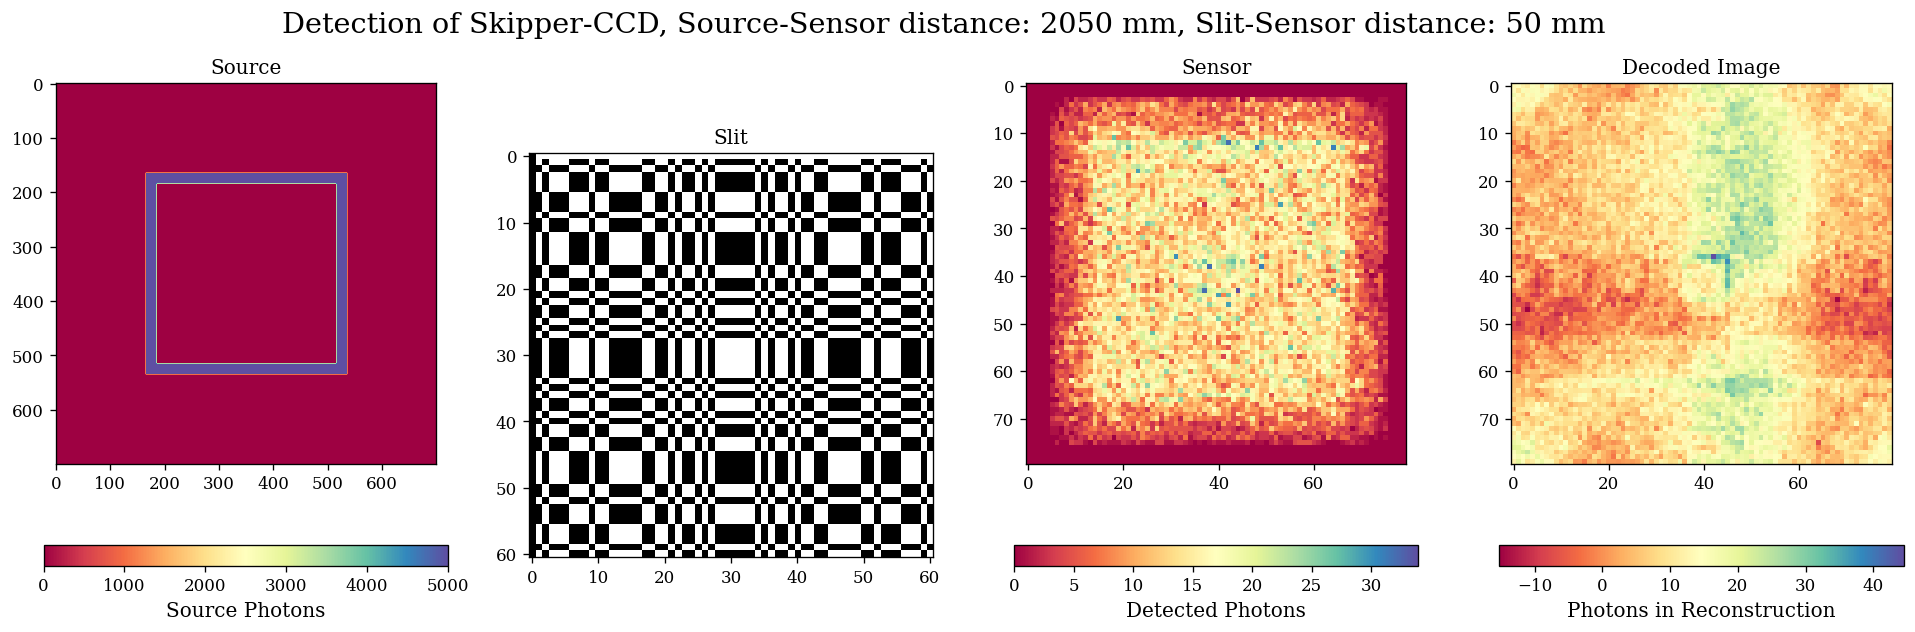

Modified Uniformly Redundant Array
----------------------------------
rank:   7
L:      61
tile:   (1, 1)
width:  61
height: 61
The chosen directory is not empty:
results\mura_exp2\testing2_mura2


Process 17248:   0%|          | 6/5000 [00:00<01:31, 54.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 17248: 100%|██████████| 5000/5000 [01:14<00:00, 67.16it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


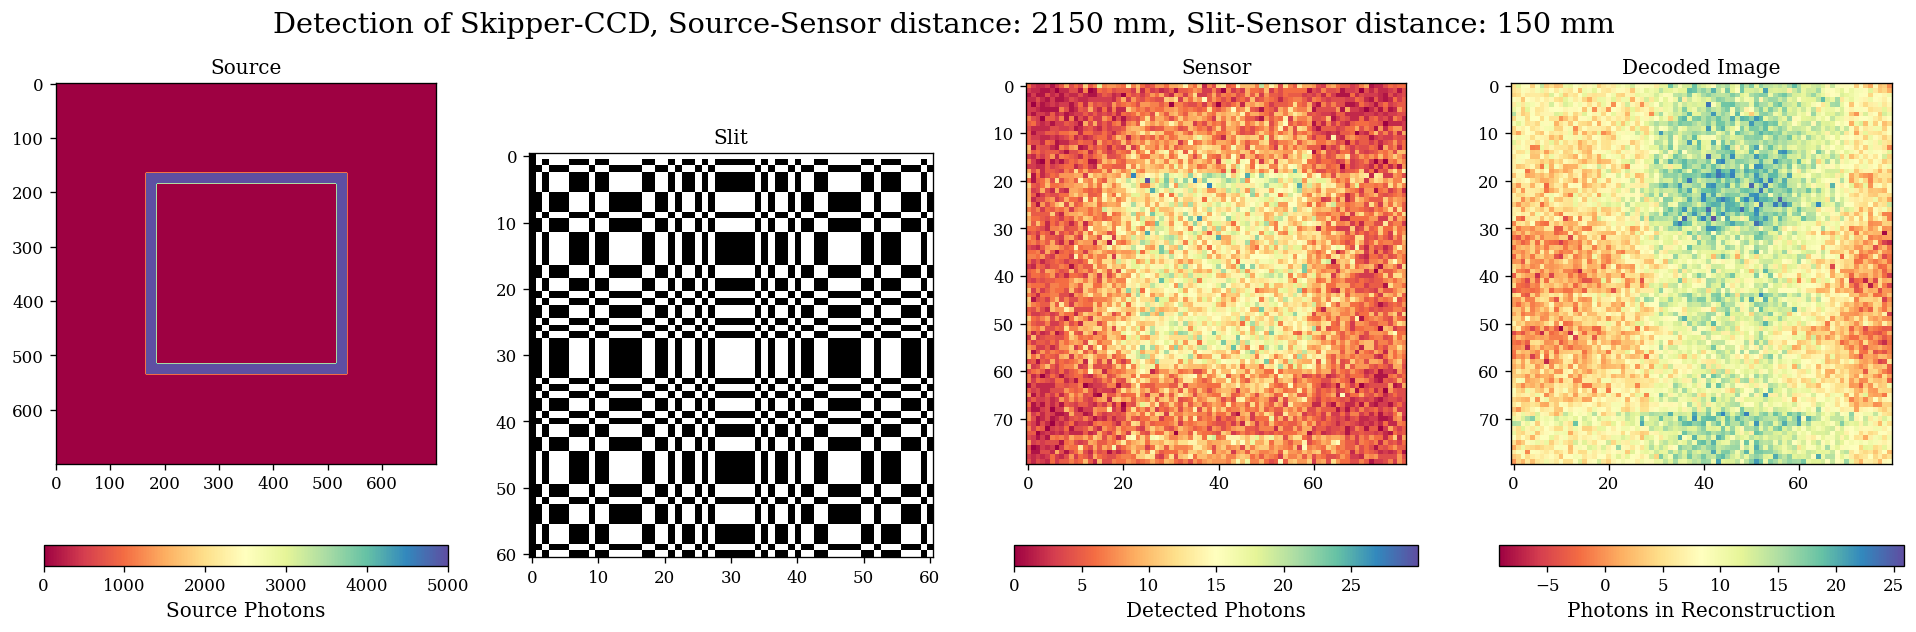

In [8]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators2.append(simulator)
    graph_ca(simulator=simulator)

### **3.2) Fourier**

In [2]:
config = 'g_exp.json'

In [4]:
source, slit, sensor, decoder, options = get_objects_from_config(config)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
play_simulation(simulator=simulator, config_path=config)

Process 11592:   0%|          | 0/10000 [00:00<?, ?it/s]

Process 11592:   0%|          | 39/10000 [00:00<00:27, 357.90it/s]

Simulating the propagation of photons through the slit...


Process 11592: 100%|██████████| 10000/10000 [00:28<00:00, 352.91it/s]


Adding noise to the image...
Decoding Image
Done!
Saving results...


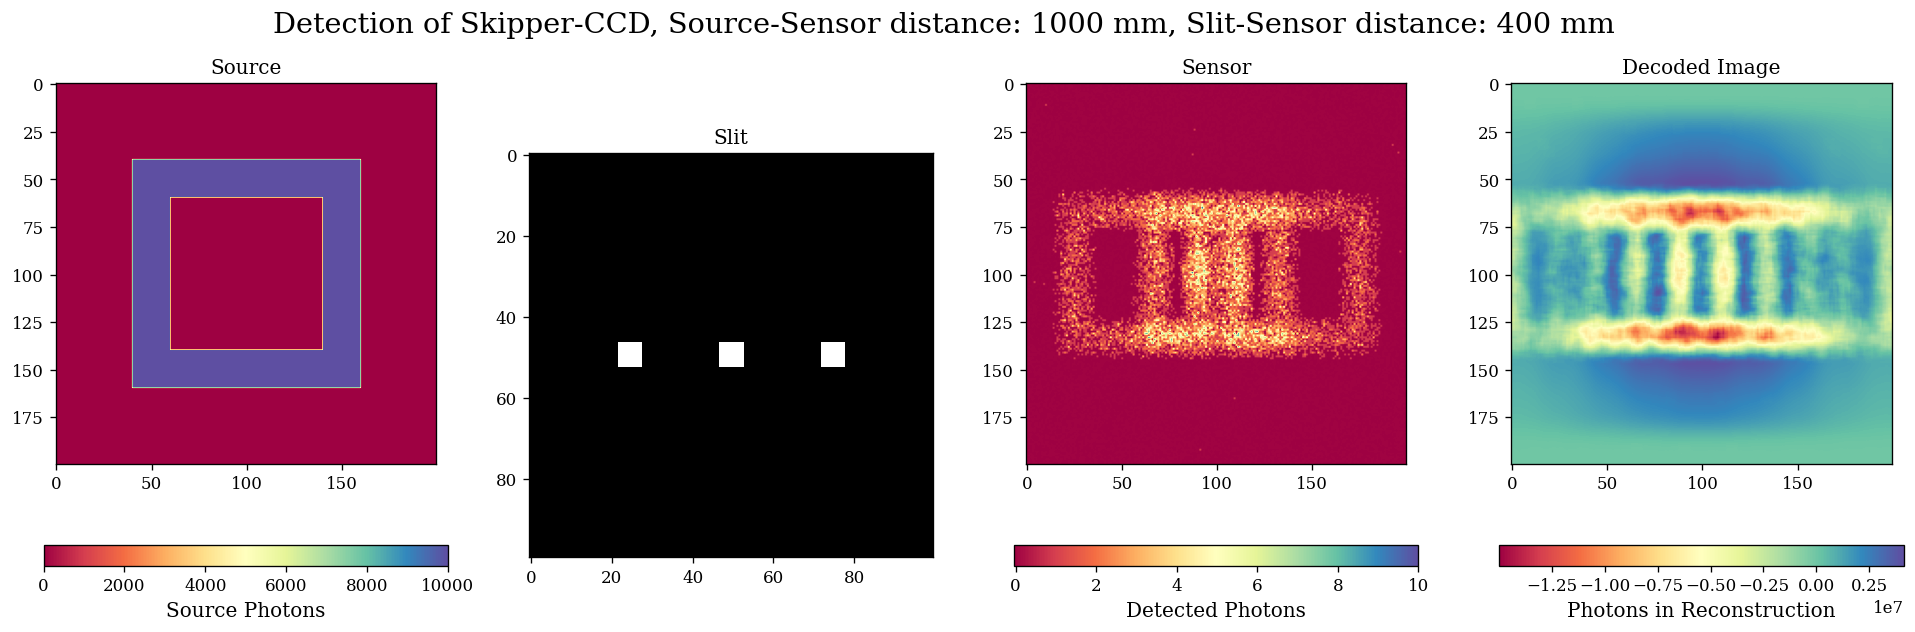

In [5]:
graph_ca(simulator=simulator)

### **3.3) Fourier with MURA Pattern**

In [3]:
config = 'mura_fourier_experiments/mf_exp0.json'

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp0\testing_fourier_mura0


Process 18212:   0%|          | 5/4000 [00:00<01:30, 44.21it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 18212: 100%|██████████| 4000/4000 [01:08<00:00, 58.32it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


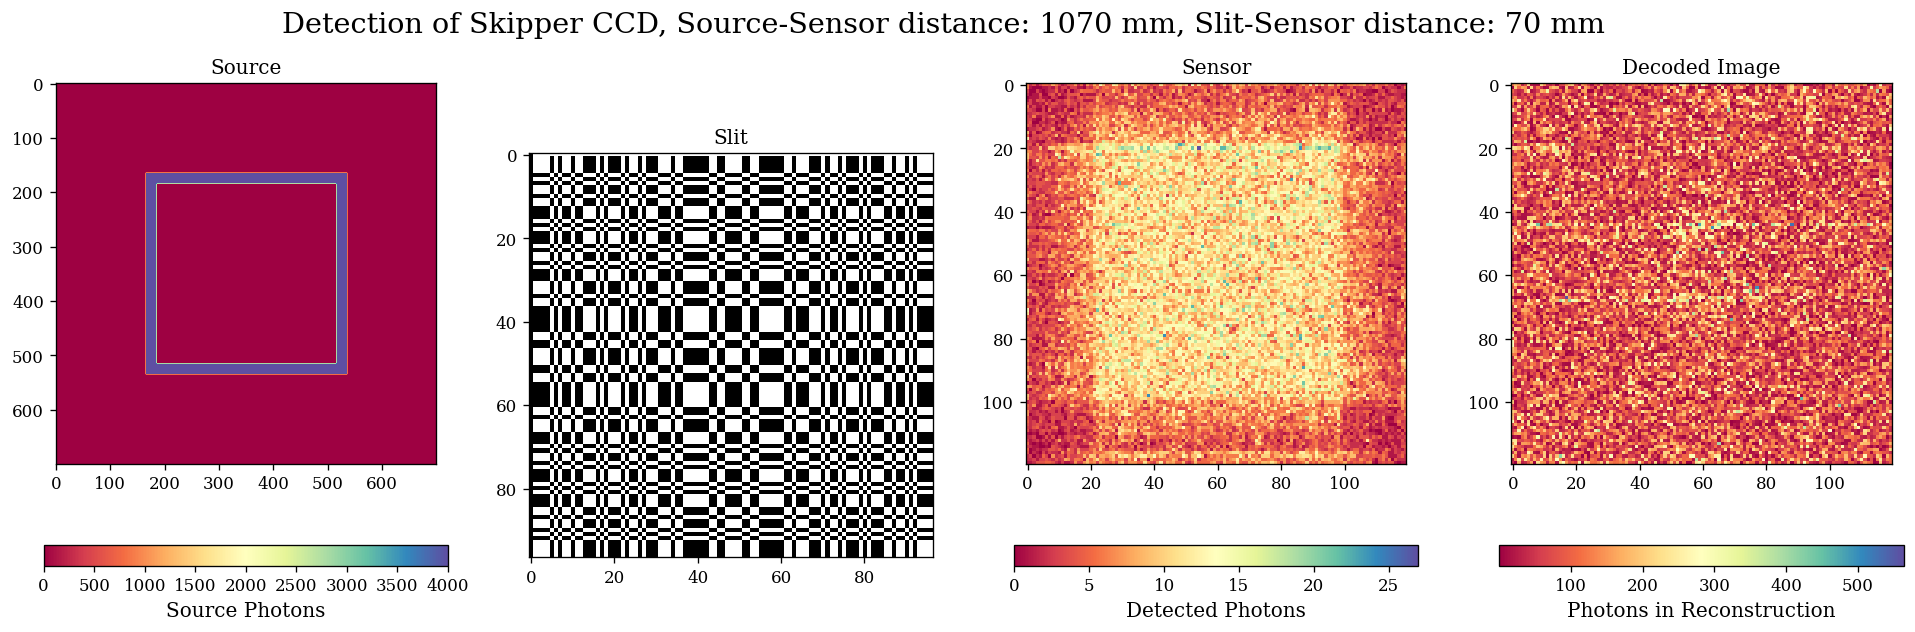

In [4]:
source, slit, sensor, decoder, options = get_objects_from_config(config)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
play_simulation(simulator=simulator, config_path=config)
graph_ca(simulator=simulator)

In [8]:
configs = ['mura_fourier_experiments/mf_exp0.json', 'mura_fourier_experiments/mf_exp1.json', 'mura_fourier_experiments/mf_exp2.json', 'mura_fourier_experiments/mf_exp3.json', 'mura_fourier_experiments/mf_exp4.json']
simulators = []

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp0\testing_fourier_mura0


Process 16964:   0%|          | 5/4000 [00:00<01:47, 37.04it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16964: 100%|██████████| 4000/4000 [01:04<00:00, 61.71it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


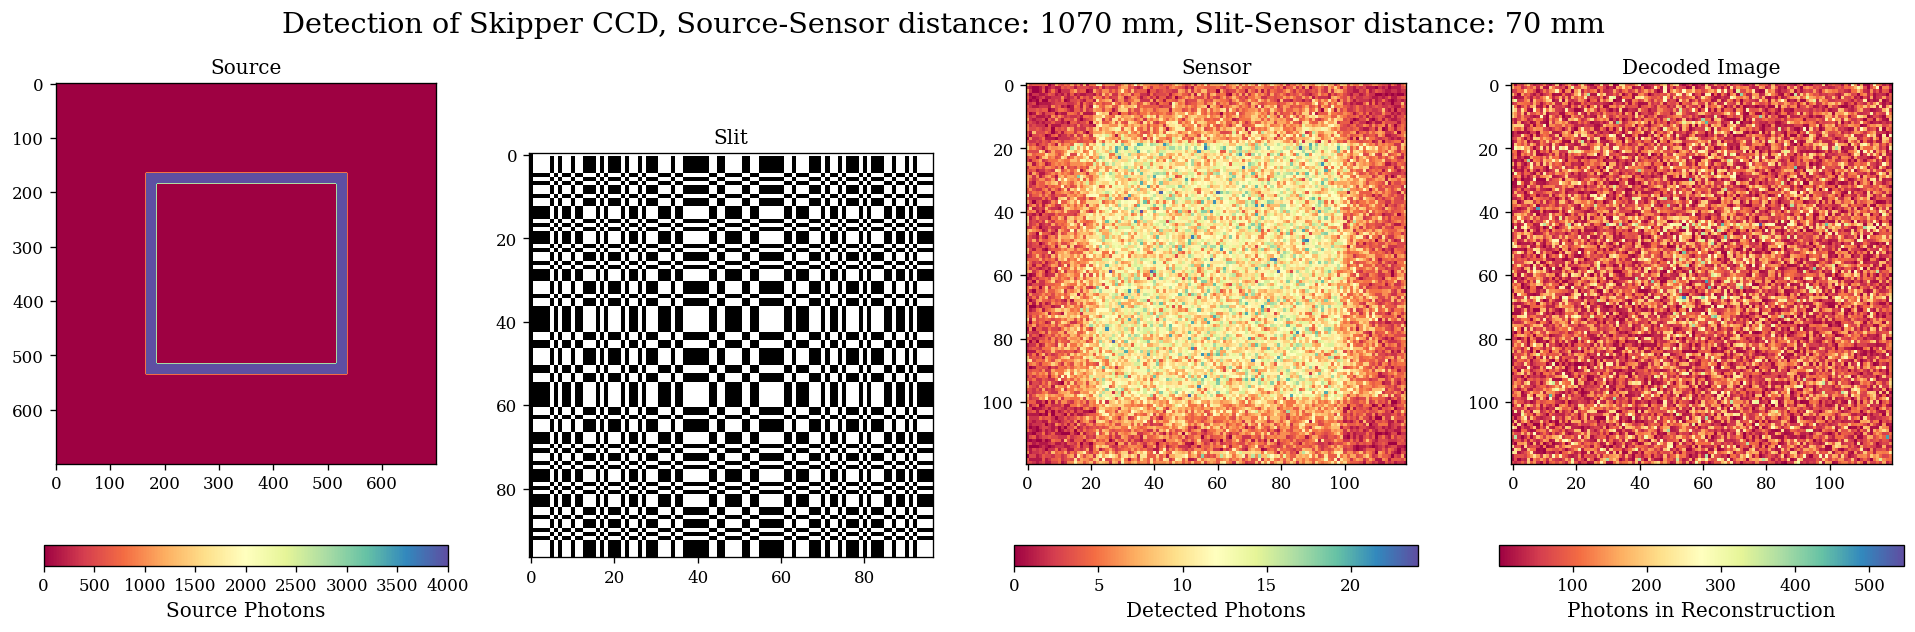

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp1\testing_fourier_mura1


Process 16964:   0%|          | 3/4000 [00:00<02:56, 22.58it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16964: 100%|██████████| 4000/4000 [00:58<00:00, 67.87it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


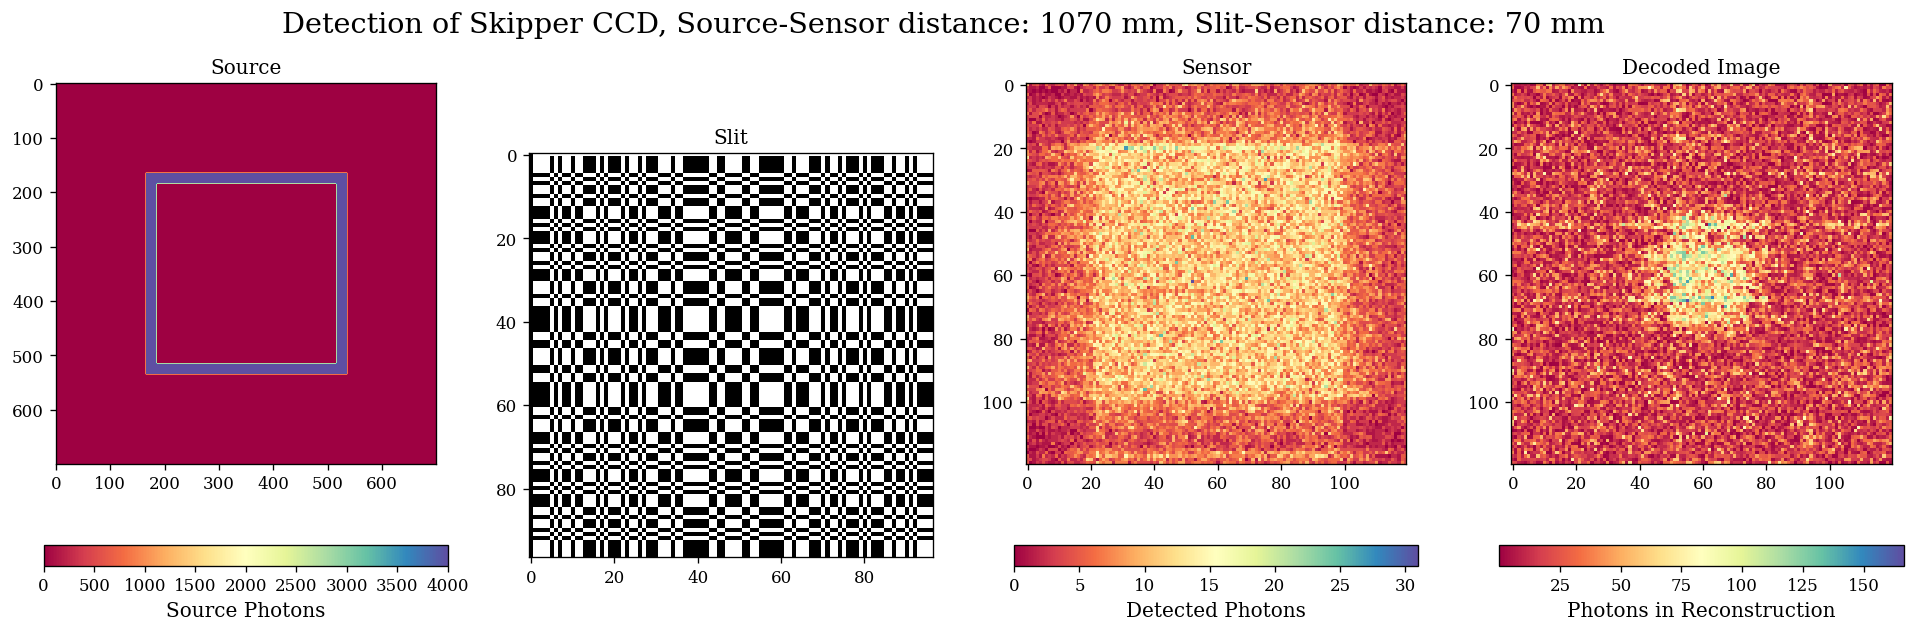

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp2\testing_fourier_mura2


Process 16964:   0%|          | 6/4000 [00:00<01:18, 50.58it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16964: 100%|██████████| 4000/4000 [01:01<00:00, 65.02it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


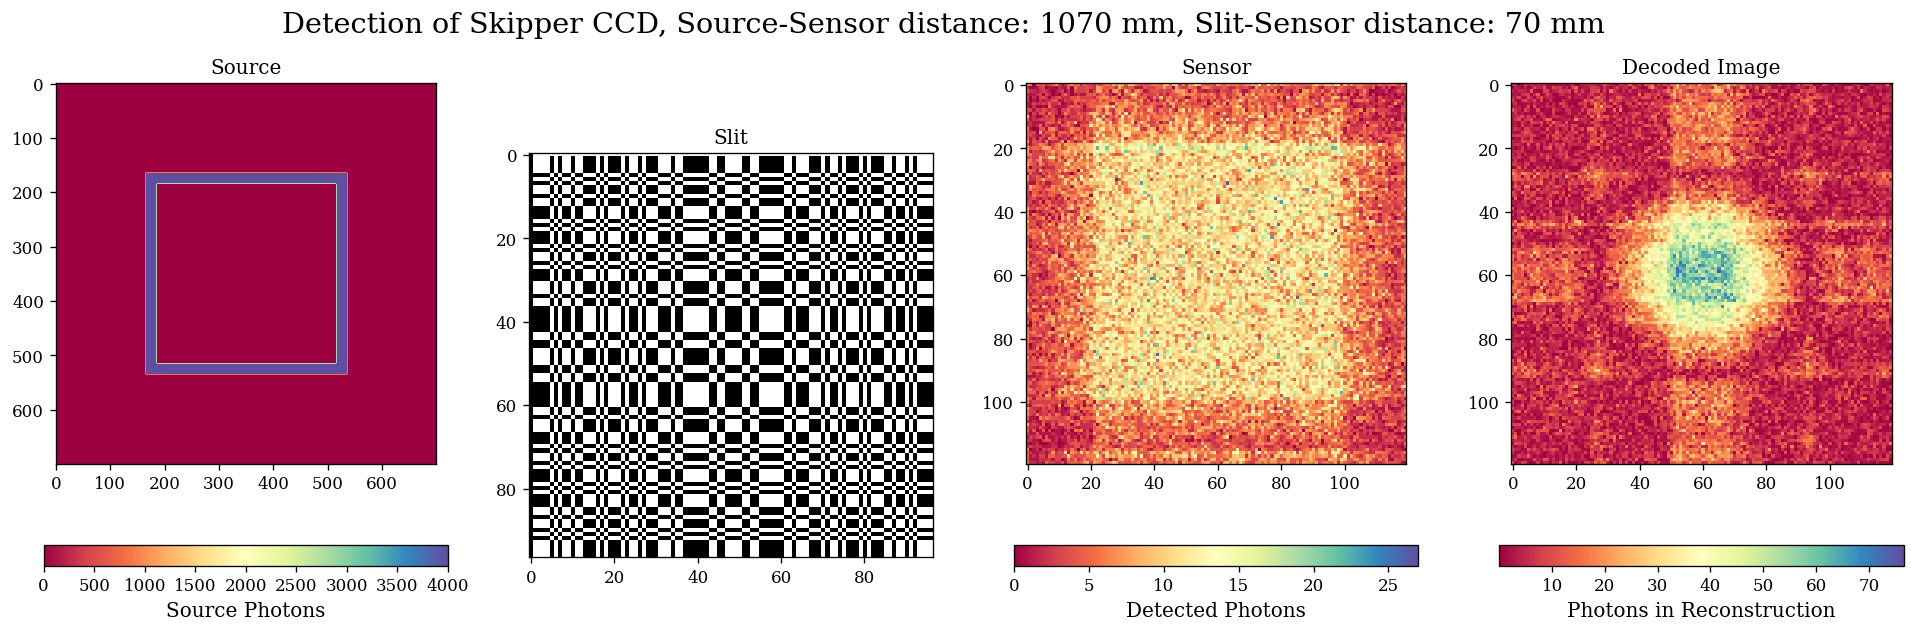

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp3\testing_fourier_mura3


Process 16964:   0%|          | 6/4000 [00:00<01:13, 54.57it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16964: 100%|██████████| 4000/4000 [00:57<00:00, 69.48it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


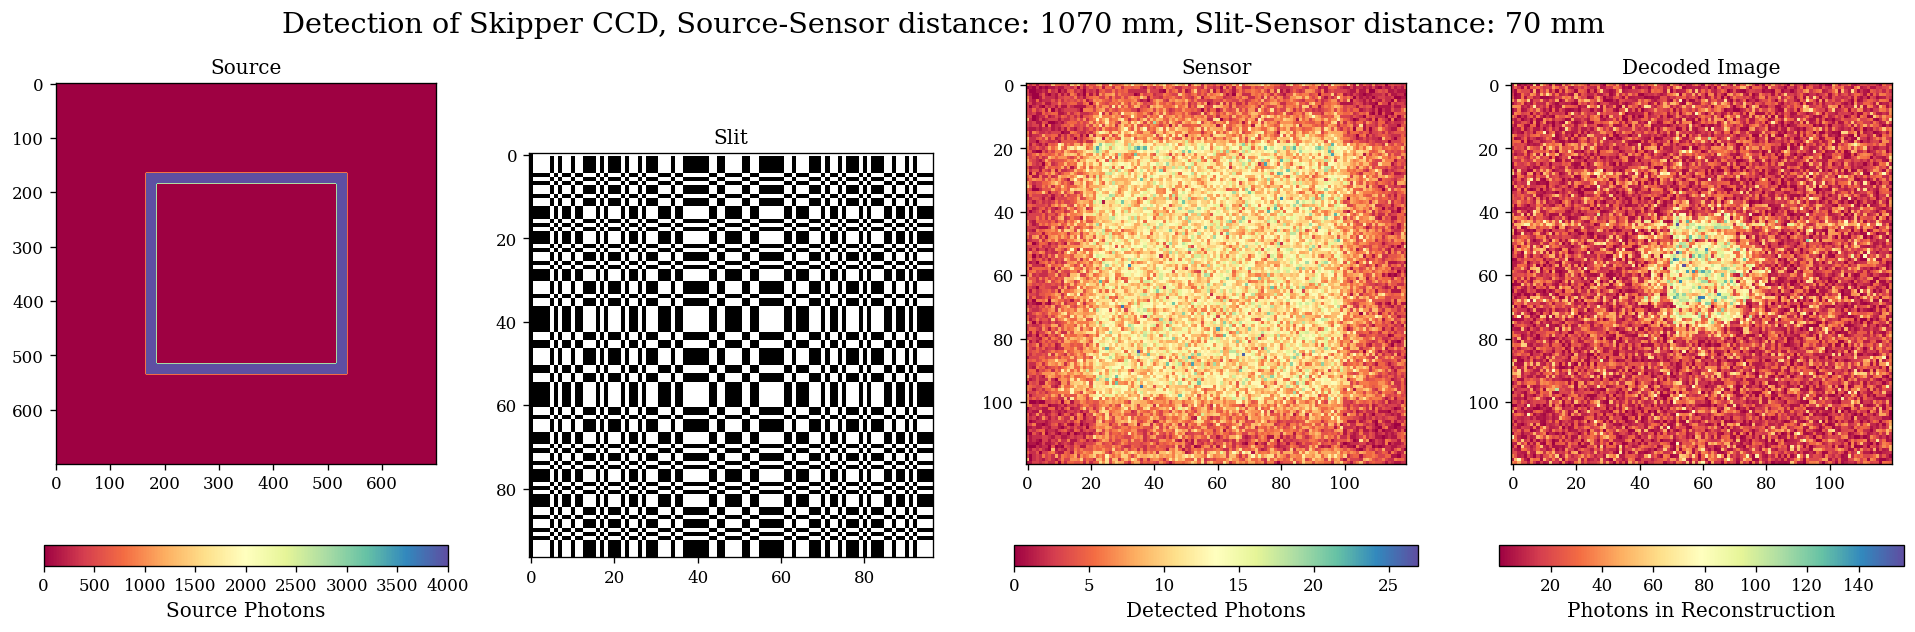

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97
The chosen directory is not empty:
results\mf_exp4\testing_fourier_mura4


Process 16964:   0%|          | 5/4000 [00:00<01:25, 46.96it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16964: 100%|██████████| 4000/4000 [00:57<00:00, 69.26it/s]


Adding noise to the image...
Decoding Image...
Done!
Saving results...


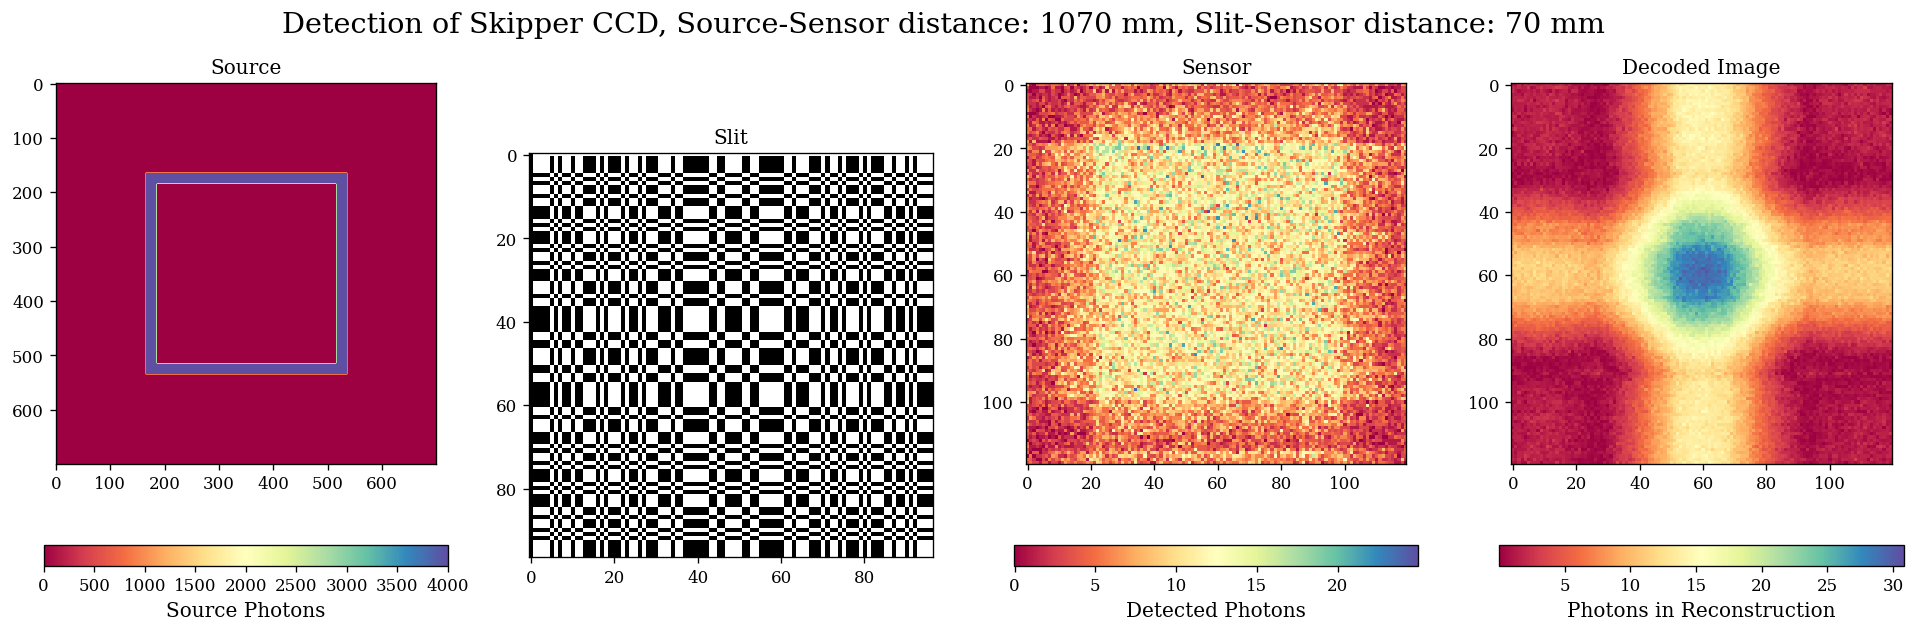

In [9]:
for config in configs:
    source, slit, sensor, decoder, options = get_objects_from_config(config)
    simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
    play_simulation(simulator=simulator, config_path=config)
    simulators.append(simulator)
    graph_ca(simulator=simulator)

## 4) Ver de reconstruir y convolucionar el experimento de George y Juli 

In [2]:
def zoom_out_image(image: np.ndarray, zoom_out_factor: float):
    """
    Zooms out an image by a factor of zoom_out_factor, by taking the average of blocks of pixels, 
    and then zero padding the edges to take it back to the original size.

    Parameters
    ----------
    image : np.ndarray
        The image to be zoomed out
    zoom_out_factor : int
        The factor by which the image should be zoomed out. Must be an integer greater than 1.

    Returns
    -------
    np.ndarray
        The zoomed out image
    """
    
    zoom_out_factor = int(zoom_out_factor)

    # Calculate the new dimensions
    new_rows = image.shape[0] // zoom_out_factor
    new_cols = image.shape[1] // zoom_out_factor

    # Create an empty image with the new dimensions
    downsampled_image = np.empty((new_rows, new_cols), dtype=image.dtype)

    # Populate the downsampled image by taking the average of blocks from the original image
    for i in range(new_rows):
        for j in range(new_cols):
            block = image[i * zoom_out_factor:(i + 1) * zoom_out_factor,
                        j * zoom_out_factor:(j + 1) * zoom_out_factor]
            downsampled_image[i, j] = np.mean(block)

    # Zero pad the edges to take the downsampled image back to the original size, centering it
    padded_image = np.zeros_like(image)

    # Calculate the starting and ending indices for the padded image
    start_row = (padded_image.shape[0] - downsampled_image.shape[0]) // 2
    end_row = start_row + downsampled_image.shape[0]
    start_col = (padded_image.shape[1] - downsampled_image.shape[1]) // 2
    end_col = start_col + downsampled_image.shape[1]

    # Place the downsampled image in the padded image
    padded_image[start_row:end_row, start_col:end_col] = downsampled_image

    # Plot the downsampled image
    plt.imshow(padded_image)
    return padded_image

def zoom_in_image(image: np.ndarray, zoom_in_factor: float):
    
    # Calculate the new size while maintaining the same resolution
    new_width = int(image.shape[1] * zoom_in_factor)
    new_height = int(image.shape[0] * zoom_in_factor)

    # Resize the image using OpenCV
    zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    # Crop the zoomed image to maintain the original resolution (1000x1000)
    left = (new_width - image.shape[0]) // 2
    top = (new_height - image.shape[1]) // 2
    right = left + image.shape[0]
    bottom = top + image.shape[1]
    zoomed_image = zoomed_image[top:bottom, left:right]

    # Ensure the resulting image is of the same data type as the original
    zoomed_image = zoomed_image.astype(image.dtype)
    return zoomed_image

def graph_ca(simulator):
    if simulator.sensor.dark_current_noise == 0.0005:
        sensor_name = 'Skipper CCD'
    else:
        sensor_name = 'Normal CCD'

    # Rescaling the source to the same shape, but zooming out 101 times
    zoom_factor = simulator.options.source_to_sensor_distance / simulator.options.slit_to_sensor_distance
    zoomed_out_source = zoom_out_image(source, zoom_factor)

    image = convolve(zoomed_out_source, slit, mode='wrap')
    reconstructed_image = convolve(image, simulator.decoder.decoding_pattern, mode='wrap')
    
    simulation_zoom_factor = zoom_factor/(np.max(simulator.source.shape)/np.max(simulator.sensor.screen.shape))
    image_zoom_factor = zoom_factor / simulation_zoom_factor

    # Zoom in the image to match the shape of the sensor
    reconstructed_image = zoom_in_image(reconstructed_image, zoom_factor)
    image = zoom_in_image(image, image_zoom_factor)

    # Zoom in the simulation results to match the scale of the source image.
    simulation_decoded_image = zoom_in_image(simulator.decoder.decoded_image, simulation_zoom_factor)

    fig, axs = plt.subplots(ncols = 3, nrows= 3, figsize = (15,6))
    plt.suptitle(f'Detection of {sensor_name}, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: {simulator.options.source_to_sensor_distance - simulator.options.source_to_slit_distance} mm', fontsize = 'xx-large')
    
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0][0].set_title("Source")
    axs[0][0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[0][1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[0][1].set_title("Slit")
    axs[0][1].grid(False)

    im2 = axs[1][0].imshow(simulator.sensor.screen, cmap = "Spectral")
    axs[1][0].set_title("Sensor")
    axs[1][0].grid(False)
    fig.colorbar(im2, ax=axs[1][0], label = 'Detected Photons', orientation = 'horizontal')
    im3 = axs[1][1].imshow((image), cmap = "Spectral")
    axs[1][1].set_title("Convolved Image")
    axs[1][1].grid(False)
    fig.colorbar(im3, ax=axs[1][1], label = 'Photons in Convolution', orientation = 'horizontal')
    
    im3 = axs[2][0].imshow((simulation_decoded_image), cmap = "Spectral")
    axs[2][0].set_title("Decoded Image")
    axs[2][0].grid(False)
    fig.colorbar(im3, ax=axs[2][0], label = 'Photons in Reconstruction', orientation = 'horizontal')
    im3 = axs[2][1].imshow((reconstructed_image), cmap = "Spectral")
    axs[2][1].set_title("Decoded Convolved Image")
    axs[2][1].grid(False)
    fig.colorbar(im3, ax=axs[2][1], label = 'Photons in Reconstruction', orientation = 'horizontal')

    fig.savefig(os.path.join(simulator.saving_dir, "results.png"))
    plt.show()


In [3]:
config = 'exp_replicar_exp_jg.json'

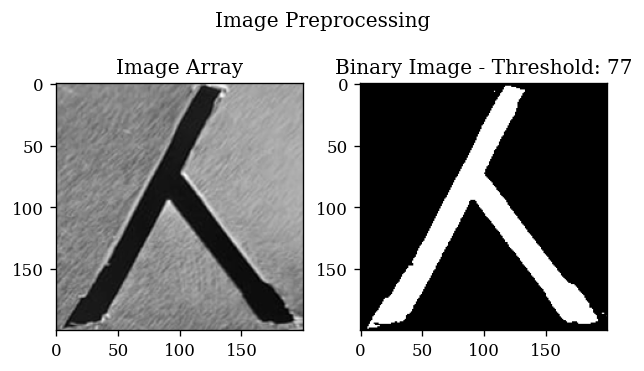

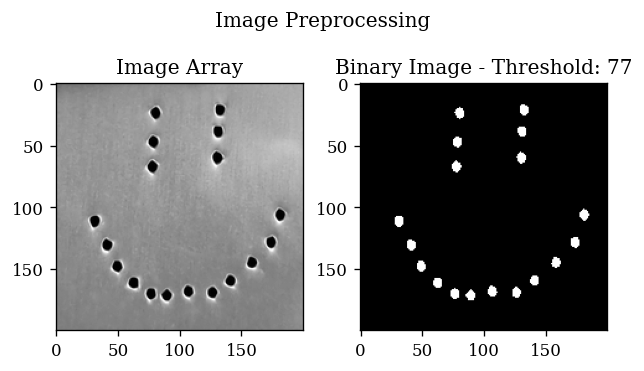

Process 20240:   0%|          | 33/50000 [00:00<02:31, 329.56it/s]

Simulating the propagation of photons through the slit...


Process 20240: 100%|██████████| 50000/50000 [01:25<00:00, 584.54it/s]


Adding noise to the image...
Decoding Image...


TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [4]:
source, slit, sensor, decoder, options = get_objects_from_config(config)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor, decoder=decoder)
play_simulation(simulator=simulator, config_path=config)
graph_ca(simulator=simulator)

In [17]:
np.sum(simulator.slit.mask)

919

In [15]:
simulator.slit.mask /= np.sum(simulator.slit.mask)

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

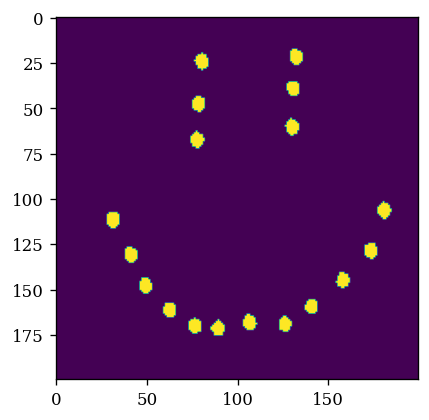

In [7]:
plt.imshow(simulator.slit.mask)